In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [325]:
df= pd.read_csv("C:\\Users\\new\\Downloads\\PRCP-1004-Fifa20\\Data\\players_20.csv")

In [326]:
pd.set_option("display.max_columns", None)

In [327]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes        195800000.00   
1  C. Ronaldo       Yes         96500000.00   
2      Neymar       Yes        195200000.00   
3      Normal       Yes        164700000.00   
4      Normal       Yes        184500000.00   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0               10.00         NaN  2004-07-01               2021.00   
1                7.00         NaN  2018-07-10               2022.00   
2               10.00         NaN  2017-08-03               2022.00   
3               13.00         NaN  2014-07-16               2023.00   
4                7.00         NaN  2019-07-01               2024.00   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN 87.00     92.00    92.00      96.00   
1              LS                  7.00 90.00     93.00    82.00      89.00   
2              LW                 10.00 91.00     85.00    87.00      95.00   
3              GK                  1.00   NaN       NaN      NaN        NaN   
4              LF                 10.00 91.00     83.00    86.00      94.00   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0      39.00   66.00        NaN          NaN         NaN          NaN   
1      35.00   78.00        NaN          NaN         NaN          NaN   
2      32.00   58.00        NaN          NaN         Na

#### Objective:

Using clustering algorithms to categorize similar players using their traits and their different skills in the field.


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [329]:
df.columns. tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

1. sofifa_id:
A unique identifier for each player in the dataset, typically used to link to FIFA databases or other player-related resources.
2. player_url:
The URL link to the player's profile page, likely on a site like soFIFA, where detailed statistics and career information can be found.
3. short_name:
The abbreviated or commonly used name of the player (e.g., "Leo" for Lionel Messi).
4. long_name:
The full name of the player (e.g., "Lionel Messi").
5. age:
The player's age at the time the data was collected.
6. dob (Date of Birth):
The player's birthdate in the format (e.g., YYYY-MM-DD).
7. height_cm:
The player's height in centimeters.
8. weight_kg:
The player's weight in kilograms.
9. nationality:
The country the player represents internationally.
10. club:
The professional football club the player is currently associated with (e.g., FC Barcelona, Manchester United).
11. overall:
The overall rating of the player, usually an aggregate of their abilities in different aspects of the game.
12. potential:
The player’s potential rating, indicating their ability to improve as they develop, usually in the context of career mode in FIFA games.
13. value_eur:
The estimated market value of the player in euros.
14. wage_eur:
The player's weekly wage in euros.
15. player_positions:
The player’s position(s) on the field (e.g., forward, midfielder, goalkeeper).
16. preferred_foot:
The player’s preferred foot (either "left" or "right").
17. international_reputation:
A score or value that indicates the player’s reputation internationally, often based on performance in major tournaments.
18. weak_foot:
The rating for the player's ability to use their weaker foot.
19. skill_moves:
The rating for the player's ability to perform skill moves, such as dribbling techniques.
20. work_rate:
Describes how often the player engages in offensive and defensive actions during the game. It can have values like "high", "medium", or "low" for both attacking and defensive work rates.
21. body_type:
The player’s physical body type (e.g., "stocky", "slim"), which may affect their movement and strength.
22. real_face:
Whether the player’s real face is represented in the dataset (a boolean value: true or false).
23. release_clause_eur:
The player's release clause in euros, which is the fee a club must pay to buy out the player’s contract.
24. player_tags:
A list of special traits or attributes associated with the player, such as "leader", "injury-prone", etc.
25. team_position:
The player’s official team position (e.g., Captain, Vice-Captain, etc.).
26. team_jersey_number:
The player’s jersey number within the team.
27. loaned_from:
The club from which the player is on loan, if applicable.
28. joined:
The year the player joined their current club.
29. contract_valid_until:
The year until which the player's contract with the club is valid.
30. nation_position:
The player’s position within their national team (e.g., starting player, substitute).
31. nation_jersey_number:
The player’s national team jersey number.
32. pace:
The player’s pace rating, indicating their speed on the field (a key attribute for wingers and forwards).
33. shooting:
The player’s ability to shoot and score goals.
34. passing:
The player’s passing ability, which includes short, long, and through passes.
35. dribbling:
The player’s ability to maneuver around opponents with the ball.
36. defending:
The player’s defensive capabilities, including tackling and intercepting passes.
37. physic:
The player’s physical strength, balance, and stamina.
38. gk_diving:
Goalkeeping skill related to diving for saves.
39. gk_handling:
Goalkeeping skill related to handling the ball.
40. gk_kicking:
Goalkeeping skill related to kicking the ball.
41. gk_reflexes:
Goalkeeping skill related to reflexes and reaction time.
42. gk_speed:
Goalkeeping skill related to the speed of movement.
43. gk_positioning:
Goalkeeping skill related to positioning for saves.
44. player_traits:
Special attributes or behaviors the player has (e.g., "Flair", "Injury Prone", "Leadership").
45. attacking_crossing:
The player’s ability to cross the ball in attacking situations.
46. attacking_finishing:
The player’s ability to finish chances and score goals.
47. attacking_heading_accuracy:
The player’s ability to accurately head the ball during attacking situations.
48. attacking_short_passing:
The player’s skill in making short passes in attacking situations.
49. attacking_volleys:
The player’s ability to shoot the ball with a volley.
50. skill_dribbling:
The player's dribbling ability.
51. skill_curve:
The player’s ability to curve the ball when shooting or passing.
52. skill_fk_accuracy:
The player's ability to take free kicks accurately.
53. skill_long_passing:
The player’s ability to make long passes.
54. skill_ball_control:
The player’s skill in controlling the ball under different circumstances.
55. movement_acceleration:
The player's ability to accelerate quickly.
56. movement_sprint_speed:
The player’s sprinting speed.
57. movement_agility:
The player's ability to change direction quickly.
58. movement_reactions:
The player’s reaction speed to different game situations.
59. movement_balance:
The player’s balance and ability to maintain control when under pressure.
60. power_shot_power:
The player’s ability to hit powerful shots.
61. power_jumping:
The player’s jumping ability, important for headers and aerial duels.
62. power_stamina:
The player’s endurance and ability to maintain performance throughout the match.
63. power_strength:
The player’s physical strength, important for duels and shielding the ball.
64. power_long_shots:
The player’s ability to take and score from long-range shots.
65. mentality_aggression:
The player's level of aggression, which affects challenges and tackles.
66. mentality_interceptions:
The player's ability to intercept passes.
67. mentality_positioning:
The player’s ability to position themselves effectively in both offensive and defensive situations.
68. mentality_vision:
The player’s ability to read the game and make smart decisions.
69. mentality_penalties:
The player’s ability to take penalties.
70. mentality_composure:
The player’s ability to stay calm under pressure, especially in high-stress situations.
71. defending_marking:
The player's ability to mark opponents during defensive play.
72. defending_standing_tackle:
The player’s ability to make tackles while standing.
73. defending_sliding_tackle:
The player’s ability to make sliding tackles.
74. goalkeeping_diving:
Goalkeeping skill related to diving for saves.
75. goalkeeping_handling:
Goalkeeping skill related to catching and holding the ball.
76. goalkeeping_kicking:
Goalkeeping skill related to accurately kicking the ball.
77. goalkeeping_positioning:
Goalkeeping skill related to positioning for saves.
78. goalkeeping_reflexes:
Goalkeeping skill related to quick reflexes.
79. ls, st, rs, lw, lf, cf, rf, rw (Player Positions):
These represent positions a player might be placed in during a match (e.g., Left Striker (ls), Right Striker (rs), Left Wing (lw), Right Wing (rw), etc.).
80. lam, cam, ram, lm, lcm, cm, rcm, rm (Midfield Positions):
Various midfield positions indicating where the player plays on the field (e.g., Left Attacking Midfielder (lam), Center Midfield (cm), etc
81. lwb, ldm, cdm, rdm, rwb (Wing-Back/Defensive Midfield Positions):
Defensive and wing-back positions, indicating a player’s role in defense.
82. cb, rb, lb (Defender Positions):
Center Back (cb), Right Back (rb), Left Back (lb) positions.
83. gk (Goalkeeper):
The goalkeeper’s position.

In [330]:
df.select_dtypes(include='float')

release_clause_eur  team_jersey_number  contract_valid_until  \
0            195800000.00               10.00               2021.00   
1             96500000.00                7.00               2022.00   
2            195200000.00               10.00               2022.00   
3            164700000.00               13.00               2023.00   
4            184500000.00                7.00               2024.00   
...                   ...                 ...                   ...   
18273            70000.00               36.00               2019.00   
18274            72000.00               31.00               2022.00   
18275            70000.00               38.00               2019.00   
18276            70000.00               33.00               2022.00   
18277                 NaN               37.00               2019.00   

       nation_jersey_number  pace  shooting  passing  dribbling  defending  \
0                       NaN 87.00     92.00    92.00      96.00      39.00   
1                      7.00 90.00     93.00    82.00      89.00      35.00   
2                     10.00 91.00     85.00    87.00      95.00      32.00   
3                      1.00   NaN       NaN      NaN        NaN        NaN   
4                     10.00 91.00     83.00    86.00      94.00      35.00   
...                     ...   ...       ...      ...        ...        ...   
18273                   NaN 57.00     23.00    28.00      33.00      47.00   
18274                   NaN 58.00     24.00    33.00      35.00      48.00   
18275                   NaN 54.00     35.00    44.00      45.00      48.00   
18276                   NaN 59.00     35.00    47.00      47.00      45.00   
18277                   NaN 60.00     32.00    51.00      45.00      47.00   

       physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0       66.00        NaN          NaN         NaN          NaN       NaN   
1       78.00        NaN          NaN         NaN          NaN       NaN   
2       58.00        NaN          NaN         NaN          NaN       NaN   
3         NaN      87.00        92.00       78.00        89.00     52.00   
4       66.00        NaN          NaN         NaN          NaN       NaN   
...       ...        ...          ...         ...          ...       ...   
18273   51.00        NaN          NaN         NaN          NaN       NaN   
18274   48.00        NaN          NaN         NaN          NaN       NaN   
18275   51.00        NaN          NaN         NaN          NaN       NaN   
18276   52.00        NaN          NaN         NaN          NaN       NaN   
18277   55.00        NaN          NaN         NaN          NaN       NaN   

       gk_positioning  
0                 NaN  
1                 NaN  
2                 NaN  
3               90.00  
4                 NaN  
...               ...  
18273             NaN  
18274             NaN  
18275             NaN  
18276             NaN  
18277             NaN  

[18278 rows x 16 columns]

In [331]:
df.describe()

sofifa_id      age  height_cm  weight_kg  overall  potential  \
count   18278.00 18278.00   18278.00   18278.00 18278.00   18278.00   
mean   219738.86    25.28     181.36      75.28    66.24      71.55   
std     27960.20     4.66       6.76       7.05     6.95       6.14   
min       768.00    16.00     156.00      50.00    48.00      49.00   
25%    204445.50    22.00     177.00      70.00    62.00      67.00   
50%    226165.00    25.00     181.00      75.00    66.00      71.00   
75%    240795.75    29.00     186.00      80.00    71.00      75.00   
max    252905.00    42.00     205.00     110.00    94.00      95.00   

         value_eur  wage_eur  international_reputation  weak_foot  \
count     18278.00  18278.00                  18278.00   18278.00   
mean    2484037.64   9456.94                      1.10       2.94   
std     5585481.06  21351.71                      0.38       0.66   
min           0.00      0.00                      1.00       1.00   
25%      325000.00   1000.00                      1.00       3.00   
50%      700000.00   3000.00                      1.00       3.00   
75%     2100000.00   8000.00                      1.00       3.00   
max   105500000.00 565000.00                      5.00       5.00   

       skill_moves  release_clause_eur  team_jersey_number  \
count     18278.00            16980.00            18038.00   
mean          2.37          4740717.43               20.10   
std           0.77         11030016.29               16.60   
min           1.00            13000.00                1.00   
25%           2.00           563000.00                9.00   
50%           2.00          1200000.00               17.00   
75%           3.00          3700000.00               27.00   
max           5.00        195800000.00               99.00   

       contract_valid_until  nation_jersey_number     pace  shooting  passing  \
count              18038.00               1126.00 16242.00  16242.00 16242.00   
mean                2021.11                 12.11    67.70     52.30    57.23   
std                    1.29                  6.74    11.30     14.03    10.41   
min                 2019.00                  1.00    24.00     15.00    24.00   
25%                 2020.00                  6.00    61.00     42.00    50.00   
50%                 2021.00                 12.00    69.00     54.00    58.00   
75%                 2022.00                 18.00    75.00     63.00    64.00   
max                 2026.00                 30.00    96.00     93.00    92.00   

       dribbling  defending   physic  gk_diving  gk_handling  gk_kicking  \
count   16242.00   16242.00 16242.00    2036.00      2036.00     2036.00   
mean       62.53      51.55    64.88      65.42        63.15       61.83   
std        10.28      16.42     9.76       7.74         7.24        7.51   
min        23.00      15.00    27.00      44.00        42.00       35.00   
25%        57.00      36.00    59.00      60.00        58.00       57.00   
50%        64.00      56.00    66.00      65.00        63.00       61.00   
75%        69.00      65.00    72.00      70.00        68.00       66.00   
max        96.00      90.00    90.00      90.00        92.00       93.00   

       gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
count      2036.00   2036.00         2036.00            18278.00   
mean         66.39     37.80           63.37               49.72   
std           8.15     10.63            8.45               18.33   
min          45.00     12.00           41.00                5.00   
25%          60.75     29.00           58.00               38.00   
50%          66.00     39.00           64.00               54.00   
75%          72.00     46.00           69.00               64.00   
max          92.00     65.00           91.00               93.00   

       attacking_finishing  attacking_heading_accuracy  \
count             18278.00                    18278.00   
mean                 45.59                

In [332]:
df.describe(include='object')

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type real_face player_tags  \
count           18278          18278     18278     18278        1499   
unique              2              9        10         2          83   
top             Right  Medium/Medium    Normal        No   #Strength   
freq            13960           9875     10750     16310         514   

       team_position loaned_from      joined nation_position  player_traits  \
count          18038        1048       16990            1126           7566   
unique            29         316        1760              26            921   
top              SUB    Sassuolo  2019-07-01             SUB  Early Crosser   
freq            7820          17        1465             587            501   

           ls     st     rs     lw     lf     cf     rf     rw    lam    cam  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique     94     94     94    107    103    103    103    107    103    103   
top      61+2   61+2   61+2   63+2   63+2   63+2   63+2   63+2   61+2   61+2   
freq      725    725    725    736    727    727    727    736    748    748   

          ram     lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique    103    100     88     88     88    100     98     98     98     98   
top      61+2   61+2   58+2   58+2   58+2   61+2   59+2   59+2   59+2   59+2   
freq      748    809    775    775    775    809    682    636    636    636   

          rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  
unique     98     96    110    110    110     96  
top      59+2   61+2   63+2   63+2   63+2   61+2  
freq      682    667    621    621    621    667

wage_eur is zero for some players. let us check this:

In [333]:
df[df['wage_eur']==0]

sofifa_id                                         player_url  \
327       245309  https://sofifa.com/player/245309/egidio-maestr...   
328       245313  https://sofifa.com/player/245313/jose-maria-si...   
407       245299  https://sofifa.com/player/245299/jaime-nicolas...   
408       245304  https://sofifa.com/player/245304/saul-marcelo-...   
409       245305  https://sofifa.com/player/245305/luis-roberto-...   
...          ...                                                ...   
16353     251735  https://sofifa.com/player/251735/amanpreet-var...   
16354     251745  https://sofifa.com/player/251745/chapal-palan/...   
16356     252735  https://sofifa.com/player/252735/hristo-ivanov...   
16600     252359  https://sofifa.com/player/252359/eliezer-ira-t...   
16714     251750  https://sofifa.com/player/251750/dhwanil-singh...   

        short_name                long_name  age         dob  height_cm  \
327    E. Schetino  Egidio Maestre Schetino   27  1992-02-29        185   
328     J. Sildero       José María Sildero   27  1992-02-29        177   
407    J. Frendado   Jaime Nicolás Frendado   35  1984-02-29        181   
408      S. Ardero      Saúl Marcelo Ardero   31  1988-02-29        171   
409      L. Dálves      Luis Roberto Dálves   27  1992-02-29        188   
...            ...                      ...  ...         ...        ...   
16353    A. Varkay         Amanpreet Varkay   33  1985-08-18        179   
16354     C. Palan             Chapal Palan   28  1991-06-20        181   
16356    H. Ivanov            Hristo Ivanov   37  1982-04-06        176   
16600  E. Ira Tape         Eliezer Ira Tape   21  1997-08-31        192   
16714   D. Singhal          Dhwanil Singhal   34  1984-11-09        177   

       weight_kg  nationality           club  overall  potential  value_eur  \
327           80      Uruguay        Uruguay       82         82          0   
328           75      Uruguay        Uruguay       82         82          0   
407           82      Uruguay        Uruguay       81         81          0   
408           63      Uruguay        Uruguay       81         81          0   
409           83      Uruguay        Uruguay       81         81          0   
...          ...          ...            ...      ...        ...        ...   
16353         71        India          India       58         58          0   
16354         69        India          India       58         58          0   
16356         65     Bulgaria       Bulgaria       58         58          0   
16600         85  Ivory Coast  Côte d'Ivoire       57         66          0   
16714         71        India          India       57         57          0   

       wage_eur player_positions preferred_foot  international_reputation  \
327           0               CB          Right                         1   
328           0          CAM, RM          Right                         1   
407           0          CB, CDM          Right                         1   
408           0      CAM, LM, LW           Left                         1   
409           0           ST, CF          Right                         1   
...         ...              ...            ...                       ...   
16353         0               LB           Left                         1   
16354         0               CM          Right                         1   
16356         0               GK          Right                         1   
16600         0               GK          Right                         1   
16714         0              CDM          Right                         1   

       weak_foot  skill_moves      work_rate body_type real_face  \
327            3            2  Medium/Medium    Normal        No   
328            4            4     Medium/Low    Normal        No   
407            3            2    High/Medium    Normal        No   
408            5            4  Medium/Medium      Lean        No   
409            3            3       Hig

we need to replace these zero wage _eur with the median. 

In [334]:
df.duplicated().sum()

0

no duplicated value in the dataset

In [335]:
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [336]:
#creating a function to get the null columns
def null_values(df):
    # Get the count of null values in each column
    null_columns = df.isnull().sum()

    # Display columns with at least 1 null value
    null_columns = null_columns[null_columns > 0]
    
    return null_columns

In [337]:
null_values(df) #checking null values

release_clause_eur       1298
player_tags             16779
team_position             240
team_jersey_number        240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
ram                      2036
lm        

 so these features have null values in it.

the columns ls to rb  are object datatype here since its values are entered here like 89+2,  92+3 in such a way.
so we can convert it to integer by adding those numbers by removing '+' b/w them.

In [338]:
df.select_dtypes(include='object')

player_url         short_name  \
0      https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1      https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2      https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
3      https://sofifa.com/player/200389/jan-oblak/20/...           J. Oblak   
4      https://sofifa.com/player/183277/eden-hazard/2...          E. Hazard   
...                                                  ...                ...   
18273  https://sofifa.com/player/245006/shuai-shao/20...         Shao Shuai   
18274  https://sofifa.com/player/250995/mingjie-xiao/...       Xiao Mingjie   
18275  https://sofifa.com/player/252332/wei-zhang/20/...          Zhang Wei   
18276  https://sofifa.com/player/251110/haijian-wang/...       Wang Haijian   
18277  https://sofifa.com/player/233449/ximing-pan/20...         Pan Ximing   

                                 long_name         dob nationality  \
0           Lionel Andrés Messi Cuccittini  1987-06-24   Argentina   
1      Cristiano Ronaldo dos Santos Aveiro  1985-02-05    Portugal   
2            Neymar da Silva Santos Junior  1992-02-05      Brazil   
3                                Jan Oblak  1993-01-07    Slovenia   
4                              Eden Hazard  1991-01-07     Belgium   
...                                    ...         ...         ...   
18273                                   邵帅  1997-03-10    China PR   
18274                         Mingjie Xiao  1997-01-01    China PR   
18275                                   张威  2000-05-16    China PR   
18276                                  汪海健  2000-08-02    China PR   
18277                                  潘喜明  1993-01-11    China PR   

                                club player_positions preferred_foot  \
0                       FC Barcelona       RW, CF, ST           Left   
1                           Juventus           ST, LW          Right   
2                Paris Saint-Germain          LW, CAM          Right   
3                    Atlético Madrid               GK          Right   
4                        Real Madrid           LW, CF          Right   
...                              ...              ...            ...   
18273               Beijing Renhe FC               CB          Right   
18274               Shanghai SIPG FC               CB          Right   
18275         Hebei China Fortune FC               CM          Right   
18276  Shanghai Greenland Shenhua FC               CM          Right   
18277         Hebei China Fortune FC               CM          Right   

           work_rate   body_type real_face  \
0         Medium/Low       Messi       Yes   
1           High/Low  C. Ronaldo       Yes   
2        High/Medium      Neymar       Yes   
3      Medium/Medium      Normal       Yes   
4        High/Medium      Normal       Yes   
...              ...         ...       ...   
18273    Medium/High      Normal        No   
18274  Medium/Medium      Normal        No   
18275     Low/Medium        Lean        No   
18276        Low/Low        Lean        No   
18277  Medium/Medium      Normal        No   

                                             player_tags team_position  \
0      #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1      #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2      #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                    NaN            GK   
4                        #Speedster, #Dribbler, #Acrobat            LW   
...                                                  ...           ...   
18273                                                NaN           RES   
18274                                                NaN           SUB   
18275                                                NaN           SUB   
18276                                                NaN           SUB   
18277                   

In [339]:
df.short_name.value_counts()

short_name
J. Rodríguez    11
Paulinho         9
J. García        8
J. Williams      7
J. Hernández     7
                ..
Eguaras          1
S. Mugoša        1
Crislan          1
L. Paganini      1
Pan Ximing       1
Name: count, Length: 17354, dtype: int64

In [340]:
df.long_name.value_counts() # names written in chineese can be seen

long_name
Liam Kelly           3
Mathias Jørgensen    2
Tommy Smith          2
Luke McCormick       2
Michael Smith        2
                    ..
Andrei Artean        1
김승규 金承奎              1
Patrick Farkas       1
Marcel Ritzmaier     1
潘喜明                  1
Name: count, Length: 18218, dtype: int64

#### we need to transform columns ls to rb to numerical

In [341]:

col=['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']


In [342]:
df[col]

ls    st    rs    lw    lf    cf    rf    rw   lam   cam   ram    lm  \
0      89+2  89+2  89+2  93+2  93+2  93+2  93+2  93+2  93+2  93+2  93+2  92+2   
1      91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3   
2      84+3  84+3  84+3  90+3  89+3  89+3  89+3  90+3  90+3  90+3  90+3  89+3   
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4      83+3  83+3  83+3  89+3  88+3  88+3  88+3  89+3  89+3  89+3  89+3  89+3   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
18273  32+2  32+2  32+2  31+2  31+2  31+2  31+2  31+2  31+2  31+2  31+2  33+2   
18274  33+2  33+2  33+2  33+2  32+2  32+2  32+2  33+2  33+2  33+2  33+2  35+2   
18275  43+2  43+2  43+2  43+2  43+2  43+2  43+2  43+2  44+2  44+2  44+2  45+2   
18276  43+2  43+2  43+2  45+2  44+2  44+2  44+2  45+2  46+2  46+2  46+2  46+2   
18277  42+2  42+2  42+2  44+2  43+2  43+2  43+2  44+2  46+2  46+2  46+2  46+2   

        lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb  \
0      87+2  87+2  87+2  92+2  68+2  66+2  66+2  66+2  68+2  63+2  52+2  52+2   
1      81+3  81+3  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3   
2      82+3  82+3  82+3  89+3  66+3  61+3  61+3  61+3  66+3  61+3  46+3  46+3   
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4      83+3  83+3  83+3  89+3  66+3  63+3  63+3  63+3  66+3  61+3  49+3  49+3   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
18273  33+2  33+2  33+2  33+2  43+2  42+2  42+2  42+2  43+2  45+2  46+2  46+2   
18274  36+2  36+2  36+2  35+2  44+2  43+2  43+2  43+2  44+2  46+2  47+2  47+2   
18275  46+2  46+2  46+2  45+2  47+2  49+2  49+2  49+2  47+2  47+2  49+2  49+2   
18276  46+2  46+2  46+2  46+2  48+2  48+2  48+2  48+2  48+2  48+2  49+2  49+2   
18277  46+2  46+2  46+2  46+2  48+2  49+2  49+2  49+2  48+2  48+2  50+2  50+2   

        rcb    rb  
0      52+2  63+2  
1      53+3  61+3  
2      46+3  61+3  
3       NaN   NaN  
4      49+3  61+3  
...     ...   ...  
18273  46+2  45+2  
18274  47+2  46+2  
18275  49+2  47+2  
18276  49+2  48+2  
18277  50+2  48+2  

[18278 rows x 26 columns]

In [343]:
# Function to add the values
def add_values(cell_value):
    if pd.isnull(cell_value):
        return np.nan  # Keep NaN if the value is NaN
    # Split the string by '+', convert to int, and sum the two parts
    base, boost = cell_value.split('+')
    return int(base) + int(boost)

for i in col:
    df[i]=df[i].apply(add_values)


In [344]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes        195800000.00   
1  C. Ronaldo       Yes         96500000.00   
2      Neymar       Yes        195200000.00   
3      Normal       Yes        164700000.00   
4      Normal       Yes        184500000.00   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0               10.00         NaN  2004-07-01               2021.00   
1                7.00         NaN  2018-07-10               2022.00   
2               10.00         NaN  2017-08-03               2022.00   
3               13.00         NaN  2014-07-16               2023.00   
4                7.00         NaN  2019-07-01               2024.00   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN 87.00     92.00    92.00      96.00   
1              LS                  7.00 90.00     93.00    82.00      89.00   
2              LW                 10.00 91.00     85.00    87.00      95.00   
3              GK                  1.00   NaN       NaN      NaN        NaN   
4              LF                 10.00 91.00     83.00    86.00      94.00   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0      39.00   66.00        NaN          NaN         NaN          NaN   
1      35.00   78.00        NaN          NaN         NaN          NaN   
2      32.00   58.00        NaN          NaN         Na

In [345]:
df.ls

0       91.00
1       94.00
2       87.00
3         NaN
4       86.00
         ... 
18273   34.00
18274   35.00
18275   45.00
18276   45.00
18277   44.00
Name: ls, Length: 18278, dtype: float64

now we need to remove all the Nan values from these columns.

In [346]:
# Filter rows where any of the specified columns contain NaN values
df_null = df[df[col].isnull().any(axis=1)]

# Display rows with NaN values in the specified columns
df_null

sofifa_id                                         player_url  \
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
6         192448  https://sofifa.com/player/192448/marc-andre-te...   
13        212831  https://sofifa.com/player/212831/alisson-ramse...   
14        193080  https://sofifa.com/player/193080/david-de-gea-...   
25        210257  https://sofifa.com/player/210257/ederson-santa...   
...          ...                                                ...   
18231     251365  https://sofifa.com/player/251365/patryk-krolcz...   
18239     252151  https://sofifa.com/player/252151/vegard-storsv...   
18251     245408  https://sofifa.com/player/245408/george-sykes-...   
18259     248182  https://sofifa.com/player/248182/hannes-sveije...   
18272     251789  https://sofifa.com/player/251789/paul-martin/2...   

               short_name                  long_name  age         dob  \
3                J. Oblak                  Jan Oblak   26  1993-01-07   
6           M. ter Stegen      Marc-André ter Stegen   27  1992-04-30   
13                Alisson      Alisson Ramses Becker   26  1992-10-02   
14                 De Gea      David De Gea Quintana   28  1990-11-07   
25                Ederson  Ederson Santana de Moraes   25  1993-08-17   
...                   ...                        ...  ...         ...   
18231         P. Królczyk            Patryk Królczyk   25  1994-05-10   
18239          V. Storsve             Vegard Storsve   17  2002-01-25   
18251  G. Sykes-Kenworthy     George Sykes-Kenworthy   19  1999-10-01   
18259          H. Sveijer             Hannes Sveijer   17  2002-04-28   
18272           P. Martin                Paul Martin   20  1999-01-05   

       height_cm  weight_kg          nationality               club  overall  \
3            188         87             Slovenia    Atlético Madrid       91   
6            187         85              Germany       FC Barcelona       90   
13           191         91               Brazil          Liverpool       89   
14           192         82                Spain  Manchester United       89   
25           188         86               Brazil    Manchester City       88   
...          ...        ...                  ...                ...      ...   
18231        188         81               Poland      Piast Gliwice       49   
18239        185         65               Norway      Lillestrøm SK       48   
18251        182         78              England      Bradford City       48   
18259        185         71               Sweden          IK Sirius       48   
18272        188         84  Republic of Ireland       Waterford FC       48   

       potential  value_eur  wage_eur player_positions preferred_foot  \
3             93   77500000    125000               GK          Right   
6             93   67500000    250000               GK          Right   
13            91   58000000    155000               GK          Right   
14            90   56000000    205000               GK          Right   
25            91   54500000    185000               GK           Left   
...          ...        ...       ...              ...            ...   
18231         54      30000      1000               GK          Right   
18239         70      50000      1000               GK          Right   
18251         65      50000      1000               GK          Right   
18259         63      50000      1000               GK          Right   
18272         58      40000      1000               GK          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
3                             3          3            1  Medium/Medium   
6                             3          4            1  Medium/Medium   
13                            3          3            1  Medium/Medium   
14                            4          3            1  Medium/Medium   
25                            2          3            1  Medium/Mediu

In [347]:
df_null.shape

(2036, 104)

so df_null has 2036 players whose features ls to rb are null

In [348]:
#checking players position
df.player_positions.value_counts()

player_positions
CB              2322
GK              2036
ST              1809
CM               786
CDM, CM          731
                ... 
LM, LWB, CM        1
CAM, CDM, CB       1
RM, LB             1
LB, CDM, LWB       1
RM, ST, CM         1
Name: count, Length: 643, dtype: int64

here we have 2036 players as goal keeper

In [349]:
# Grouping the DataFrame by 'player_positions'
df_grouped = df_null.groupby('player_positions')
# Display the count of NaN values in each group
df_grouped.size()  


player_positions
GK    2036
dtype: int64

so the those values in the dataset who has those features ls to rb are null are of goal_keepers.
so we are replacing the Nan values with zero here.

In [350]:
df[col] = df[col].fillna(0)

In [351]:
df[col].isnull().sum()

ls     0
st     0
rs     0
lw     0
lf     0
cf     0
rf     0
rw     0
lam    0
cam    0
ram    0
lm     0
lcm    0
cm     0
rcm    0
rm     0
lwb    0
ldm    0
cdm    0
rdm    0
rwb    0
lb     0
lcb    0
cb     0
rcb    0
rb     0
dtype: int64

In [352]:
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  overall  potential  value_eur  wage_eur  \
0                       FC Barcelona       94         94   95500000    565000   
1                           Juventus       93         93   58500000    405000   
2                Paris Saint-Germain       92         92  105500000    290000   
3                    Atlético Madrid       91         93   77500000    125000   
4                        Real Madrid       91         91   90000000    470000   
...                              ...      ...        ...        ...       ...   
18273               Beijing Renhe FC       48         56      40000      2000   
18274               Shanghai SIPG FC       48         56      40000      2000   
18275         Hebei China Fortune FC       48         56      40000      1000   
18276  Shanghai Greenland Shenhua FC       48         54      40000      1000   
18277         Hebei China Fortune FC       48         51      40000      2000   

      player_positions preferred_foot  international_reputation  weak_foot  \
0           RW, CF, ST           Left                         5          4   
1               ST, LW          Right                         5          4   
2              LW, CAM          Right                         5          5   
3                   GK          Right                         3          3   
4               LW, CF          Right                         4          4   
...                ...            ...                       ...        ...   
18273               CB          Right                         1          3   
18274               CB          Right                  

In [353]:
#checking the null values again in the main dataset
null_values(df)

release_clause_eur       1298
player_tags             16779
team_position             240
team_jersey_number        240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
dtype: int64

In [354]:
# creating a list gk which has all the features of  a goal_keeper
gk=['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']
df[gk]=df[gk].fillna(0)  #replacing null values with zero

In [355]:
null_values(df) # calling function null_values() to check the null values in df

release_clause_eur       1298
player_tags             16779
team_position             240
team_jersey_number        240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
player_traits           10712
dtype: int64

in our dataset we have only 18248 datapoints and the columns 'player_tags','loaned_from',nation_position',nation_jersey_number' have more than 16750 null values, which is more than 90%. replacing it with median/mean will only bring error so its better to remove these columns.

In [356]:
#removing those columns
df=df.drop(['player_tags','loaned_from','nation_position','nation_jersey_number'], axis=1)

In [357]:
#checking null values in df
null_values(df)

release_clause_eur       1298
team_position             240
team_jersey_number        240
joined                   1288
contract_valid_until      240
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
player_traits           10712
dtype: int64

A goal keeper doesnt have these features. we have 2036 goal keepers in this dataset
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                  

so we are replacing those null values with zero
 2036

In [358]:
#replacing those null values
gk2=['pace','shooting','passing','dribbling','defending','physic']
df[gk2]=df[gk2].fillna(0)

In [359]:
#checking null values in df
null_values(df)

release_clause_eur       1298
team_position             240
team_jersey_number        240
joined                   1288
contract_valid_until      240
player_traits           10712
dtype: int64

In [360]:
df.release_clause_eur.value_counts()

release_clause_eur
1100000.00      535
1300000.00      447
1200000.00      402
1400000.00      394
1500000.00      344
               ... 
40200000.00       1
527000.00         1
32000000.00       1
38800000.00       1
195800000.00      1
Name: count, Length: 1224, dtype: int64

so we can replace the null values in release_clause_eur with the meadian

In [361]:
#replacing null with meadian
df.loc[(df.release_clause_eur.isnull()==True),'release_clause_eur'] = np.median(df.release_clause_eur.fillna(0))
#replacing Nan with zero first to find the median

In [362]:
#checking null values
null_values(df)

team_position             240
team_jersey_number        240
joined                   1288
contract_valid_until      240
player_traits           10712
dtype: int64

In [363]:
df[df['team_position'].isnull()==True].head(2)

sofifa_id                                         player_url  \
327     245309  https://sofifa.com/player/245309/egidio-maestr...   
328     245313  https://sofifa.com/player/245313/jose-maria-si...   

      short_name                long_name  age         dob  height_cm  \
327  E. Schetino  Egidio Maestre Schetino   27  1992-02-29        185   
328   J. Sildero       José María Sildero   27  1992-02-29        177   

     weight_kg nationality     club  overall  potential  value_eur  wage_eur  \
327         80     Uruguay  Uruguay       82         82          0         0   
328         75     Uruguay  Uruguay       82         82          0         0   

    player_positions preferred_foot  international_reputation  weak_foot  \
327               CB          Right                         1          3   
328          CAM, RM          Right                         1          4   

     skill_moves      work_rate body_type real_face  release_clause_eur  \
327            2  Medium/Medium    Normal        No          1100000.00   
328            4     Medium/Low    Normal        No          1100000.00   

    team_position  team_jersey_number joined  contract_valid_until  pace  \
327           NaN                 NaN    NaN                   NaN 80.00   
328           NaN                 NaN    NaN                   NaN 81.00   

     shooting  passing  dribbling  defending  physic  gk_diving  gk_handling  \
327     43.00    56.00      65.00      83.00   76.00       0.00         0.00   
328     77.00    81.00      82.00      40.00   71.00       0.00         0.00   

     gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
327        0.00         0.00      0.00            0.00   
328        0.00         0.00      0.00            0.00   

                                         player_traits  attacking_crossing  \
327                                                NaN                  40   
328  Long Throw-in, Selfish, Argues with Officials,...                  75   

     attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
327                   38                          83                       74   
328                   74                          64                       83   

     attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
327                 44               56           45                 49   
328                 76               83           86                 78   

     skill_long_passing  skill_ball_control  movement_acceleration  \
327                  61                  72                     83   
328                  82                  80                     88   

     movement_sprint_speed  movement_agility  movement_reactions  \
327                     78                77                  85   
328                     75                83                  82   

     movement_balance  power_shot_power  power_jumping  power_stamina  \
327                68                53             69             76   
328                76                82             64             80   

     power_strength  power_long_shots  mentality_aggression  \
327              73                41                    86   
328              70                78                    62   

     mentality_interceptions  mentality_positioning  mentality_vision  \
327                       82                     38                42   
328                       40                     80                83   

     mentality_penalties  mentality_composure  defending_marking  \
327                   56                   71                 84   
328                   77                   81                 40   

     defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
327                         85                        76                  58   
328                         35                        33                  12   

     goalkeeping_handling  goalkeeping_

In [364]:
#removing column player_traits ,team_position and team_jersey_number since i dont think it is important in clustering the players


In [365]:
df=df.drop(['player_traits','team_position','team_jersey_number'], axis=1)

In [366]:
null_values(df)

joined                  1288
contract_valid_until     240
dtype: int64

In [367]:
df=df.drop(['joined','contract_valid_until'], axis=1)

In [368]:
#df['joined'] = pd.to_datetime(df['joined'], errors='coerce') # converting joined to a datetime since it is in Object
#df['contract_valid_until']=df['contract_valid_until'].astype(int)

In [369]:
# Extract the year from the 'joined' column
#df['joined_year'] = df['joined'].dt.year

In [370]:
df.head(1)

sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name  age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona       94         94   95500000    565000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   

   skill_moves   work_rate body_type real_face  release_clause_eur  pace  \
0            4  Medium/Low     Messi       Yes        195800000.00 87.00   

   shooting  passing  dribbling  defending  physic  gk_diving  gk_handling  \
0     92.00    92.00      96.00      39.00   66.00       0.00         0.00   

   gk_kicking  gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0        0.00         0.00      0.00            0.00                  88   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   

   goalkeeping_reflexes    ls    st    rs    lw    lf    cf    rf    rw   lam  \
0                     8 91.00 91.00 91.00 95.00 95.00 95.00 95.00 95.00 95.00   

    cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb  \
0 95.00 95.00 94.00 89.00 89.00 89.00 94.00 70.00 68.00 68.00 68.00 70.00   

     lb   lcb    cb   rcb    rb  
0 65.00 54.00 54.00 54.00 65.00

In [371]:
df.head(1)

sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name  age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona       94         94   95500000    565000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   

   skill_moves   work_rate body_type real_face  release_clause_eur  pace  \
0            4  Medium/Low     Messi       Yes        195800000.00 87.00   

   shooting  passing  dribbling  defending  physic  gk_diving  gk_handling  \
0     92.00    92.00      96.00      39.00   66.00       0.00         0.00   

   gk_kicking  gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0        0.00         0.00      0.00            0.00                  88   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   

   goalkeeping_reflexes    ls    st    rs    lw    lf    cf    rf    rw   lam  \
0                     8 91.00 91.00 91.00 95.00 95.00 95.00 95.00 95.00 95.00   

    cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb  \
0 95.00 95.00 94.00 89.00 89.00 89.00 94.00 70.00 68.00 68.00 68.00 70.00   

     lb   lcb    cb   rcb    rb  
0 65.00 54.00 54.00 54.00 65.00

In [372]:
null_values(df)

Series([], dtype: int64)

now our dataset has no null values

In [373]:
# I dont think these categorical columns [sofifa_id	,player_url,	short_name,	long_name] have any importance in clustering the players.
#Also column 'dob' is irrelevant since we have age here.
# so lets drop those.
#df=df.drop(['sofifa_id','player_url','short_name','long_name','dob'], axis=1)

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   player_url                  18278 non-null  object 
 2   short_name                  18278 non-null  object 
 3   long_name                   18278 non-null  object 
 4   age                         18278 non-null  int64  
 5   dob                         18278 non-null  object 
 6   height_cm                   18278 non-null  int64  
 7   weight_kg                   18278 non-null  int64  
 8   nationality                 18278 non-null  object 
 9   club                        18278 non-null  object 
 10  overall                     18278 non-null  int64  
 11  potential                   18278 non-null  int64  
 12  value_eur                   18278 non-null  int64  
 13  wage_eur                    182

# Analysis

In [375]:
len(df.columns)

95

In [376]:
df.head(2)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   

   height_cm  weight_kg nationality          club  overall  potential  \
0        170         72   Argentina  FC Barcelona       94         94   
1        187         83    Portugal      Juventus       93         93   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   

   international_reputation  weak_foot  skill_moves   work_rate   body_type  \
0                         5          4            4  Medium/Low       Messi   
1                         5          4            5    High/Low  C. Ronaldo   

  real_face  release_clause_eur  pace  shooting  passing  dribbling  \
0       Yes        195800000.00 87.00     92.00    92.00      96.00   
1       Yes         96500000.00 90.00     93.00    82.00      89.00   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0      39.00   66.00       0.00         0.00        0.00         0.00   
1      35.00   78.00       0.00         0.00        0.00         0.00   

   gk_speed  gk_positioning  attacking_crossing  attacking_finishing  \
0      0.00            0.00                  88                   95   
1      0.00            0.00                  84                   94   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87                  96                71                95   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             75              68                94   
1             95             85              78                93   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    48                       40                     94   
1                    63                       29                     95   

   mentality_vision  mentality_penalties  mentality_composure  \
0                94                   75                   96   
1                82                   85                   95   

   defending_marking  defending_standing_tackle  defending_sliding_tackle  \
0                 33                         37                        26   
1                 28                         32                        24   

   goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                   6                    11                   15   
1                   7                    11                   15   

   goalkeeping_positioning  goalkeeping_reflexes    ls    st    rs    lw  \
0                       14                     8 91.00 91.00 91.00 95.00   
1                       14                    11 94.00 94.00 94.00 92.00   

     lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm  \
0 

In [377]:
df.describe()

sofifa_id      age  height_cm  weight_kg  overall  potential  \
count   18278.00 18278.00   18278.00   18278.00 18278.00   18278.00   
mean   219738.86    25.28     181.36      75.28    66.24      71.55   
std     27960.20     4.66       6.76       7.05     6.95       6.14   
min       768.00    16.00     156.00      50.00    48.00      49.00   
25%    204445.50    22.00     177.00      70.00    62.00      67.00   
50%    226165.00    25.00     181.00      75.00    66.00      71.00   
75%    240795.75    29.00     186.00      80.00    71.00      75.00   
max    252905.00    42.00     205.00     110.00    94.00      95.00   

         value_eur  wage_eur  international_reputation  weak_foot  \
count     18278.00  18278.00                  18278.00   18278.00   
mean    2484037.64   9456.94                      1.10       2.94   
std     5585481.06  21351.71                      0.38       0.66   
min           0.00      0.00                      1.00       1.00   
25%      325000.00   1000.00                      1.00       3.00   
50%      700000.00   3000.00                      1.00       3.00   
75%     2100000.00   8000.00                      1.00       3.00   
max   105500000.00 565000.00                      5.00       5.00   

       skill_moves  release_clause_eur     pace  shooting  passing  dribbling  \
count     18278.00            18278.00 18278.00  18278.00 18278.00   18278.00   
mean          2.37          4482174.31    60.16     46.47    50.86      55.57   
std           0.77         10672187.18    23.81     21.11    20.51      21.93   
min           1.00            13000.00     0.00      0.00     0.00       0.00   
25%           2.00           596000.00    57.00     35.00    46.00      53.00   
50%           2.00          1100000.00    67.00     52.00    56.00      62.00   
75%           3.00          3200000.00    74.00     62.00    63.00      69.00   
max           5.00        195800000.00    96.00     93.00    92.00      96.00   

       defending   physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
count   18278.00 18278.00   18278.00     18278.00    18278.00     18278.00   
mean       45.81    57.65       7.29         7.03        6.89         7.40   
std        22.42    22.39      20.74        20.01       19.61        21.06   
min         0.00     0.00       0.00         0.00        0.00         0.00   
25%        31.00    55.00       0.00         0.00        0.00         0.00   
50%        52.00    64.00       0.00         0.00        0.00         0.00   
75%        64.00    71.00       0.00         0.00        0.00         0.00   
max        90.00    90.00      90.00        92.00       93.00        92.00   

       gk_speed  gk_positioning  attacking_crossing  attacking_finishing  \
count  18278.00        18278.00            18278.00             18278.00   
mean       4.21            7.06               49.72                45.59   
std       12.41           20.14               18.33                19.59   
min        0.00            0.00                5.00                 2.00   
25%        0.00            0.00               38.00                30.00   
50%        0.00            0.00               54.00                49.00   
75%        0.00            0.00               64.00                62.00   
max       65.00           91.00               93.00                95.00   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
count                    18278.00                 18278.00           18278.00   
mean                        52.22                    58.75              42.81   
std                         17.43                    14.68              17.70   
min                          5.00                     7.00               3.00   
25%                         44.00                    54.00              30.00   
50%                         56.00                    62.00              44.00   
75%                         64.00                    68.00  

<Axes: xlabel='age', ylabel='count'>

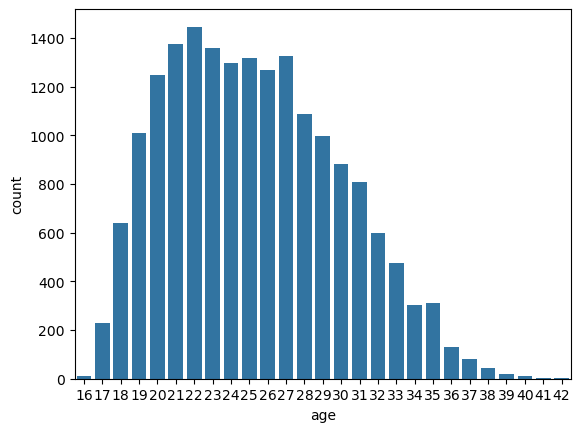

In [378]:
sns.countplot(x=df['age'])

C:\Users\new\AppData\Local\Temp\ipykernel_9360\765733261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['height_cm'])


<Axes: ylabel='Density'>

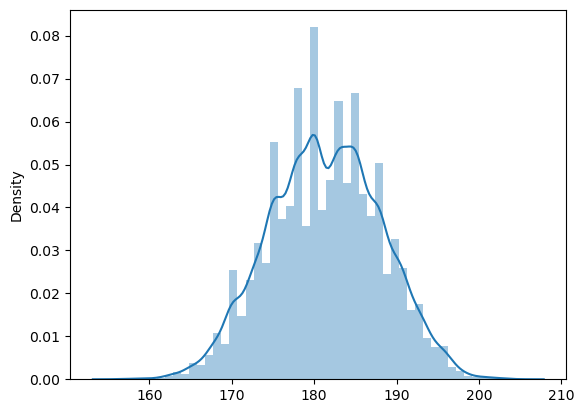

In [379]:
sns.distplot(x=df['height_cm'])

In [380]:
num_col=df.select_dtypes(exclude='object')
categ_col=df.select_dtypes(include='object')

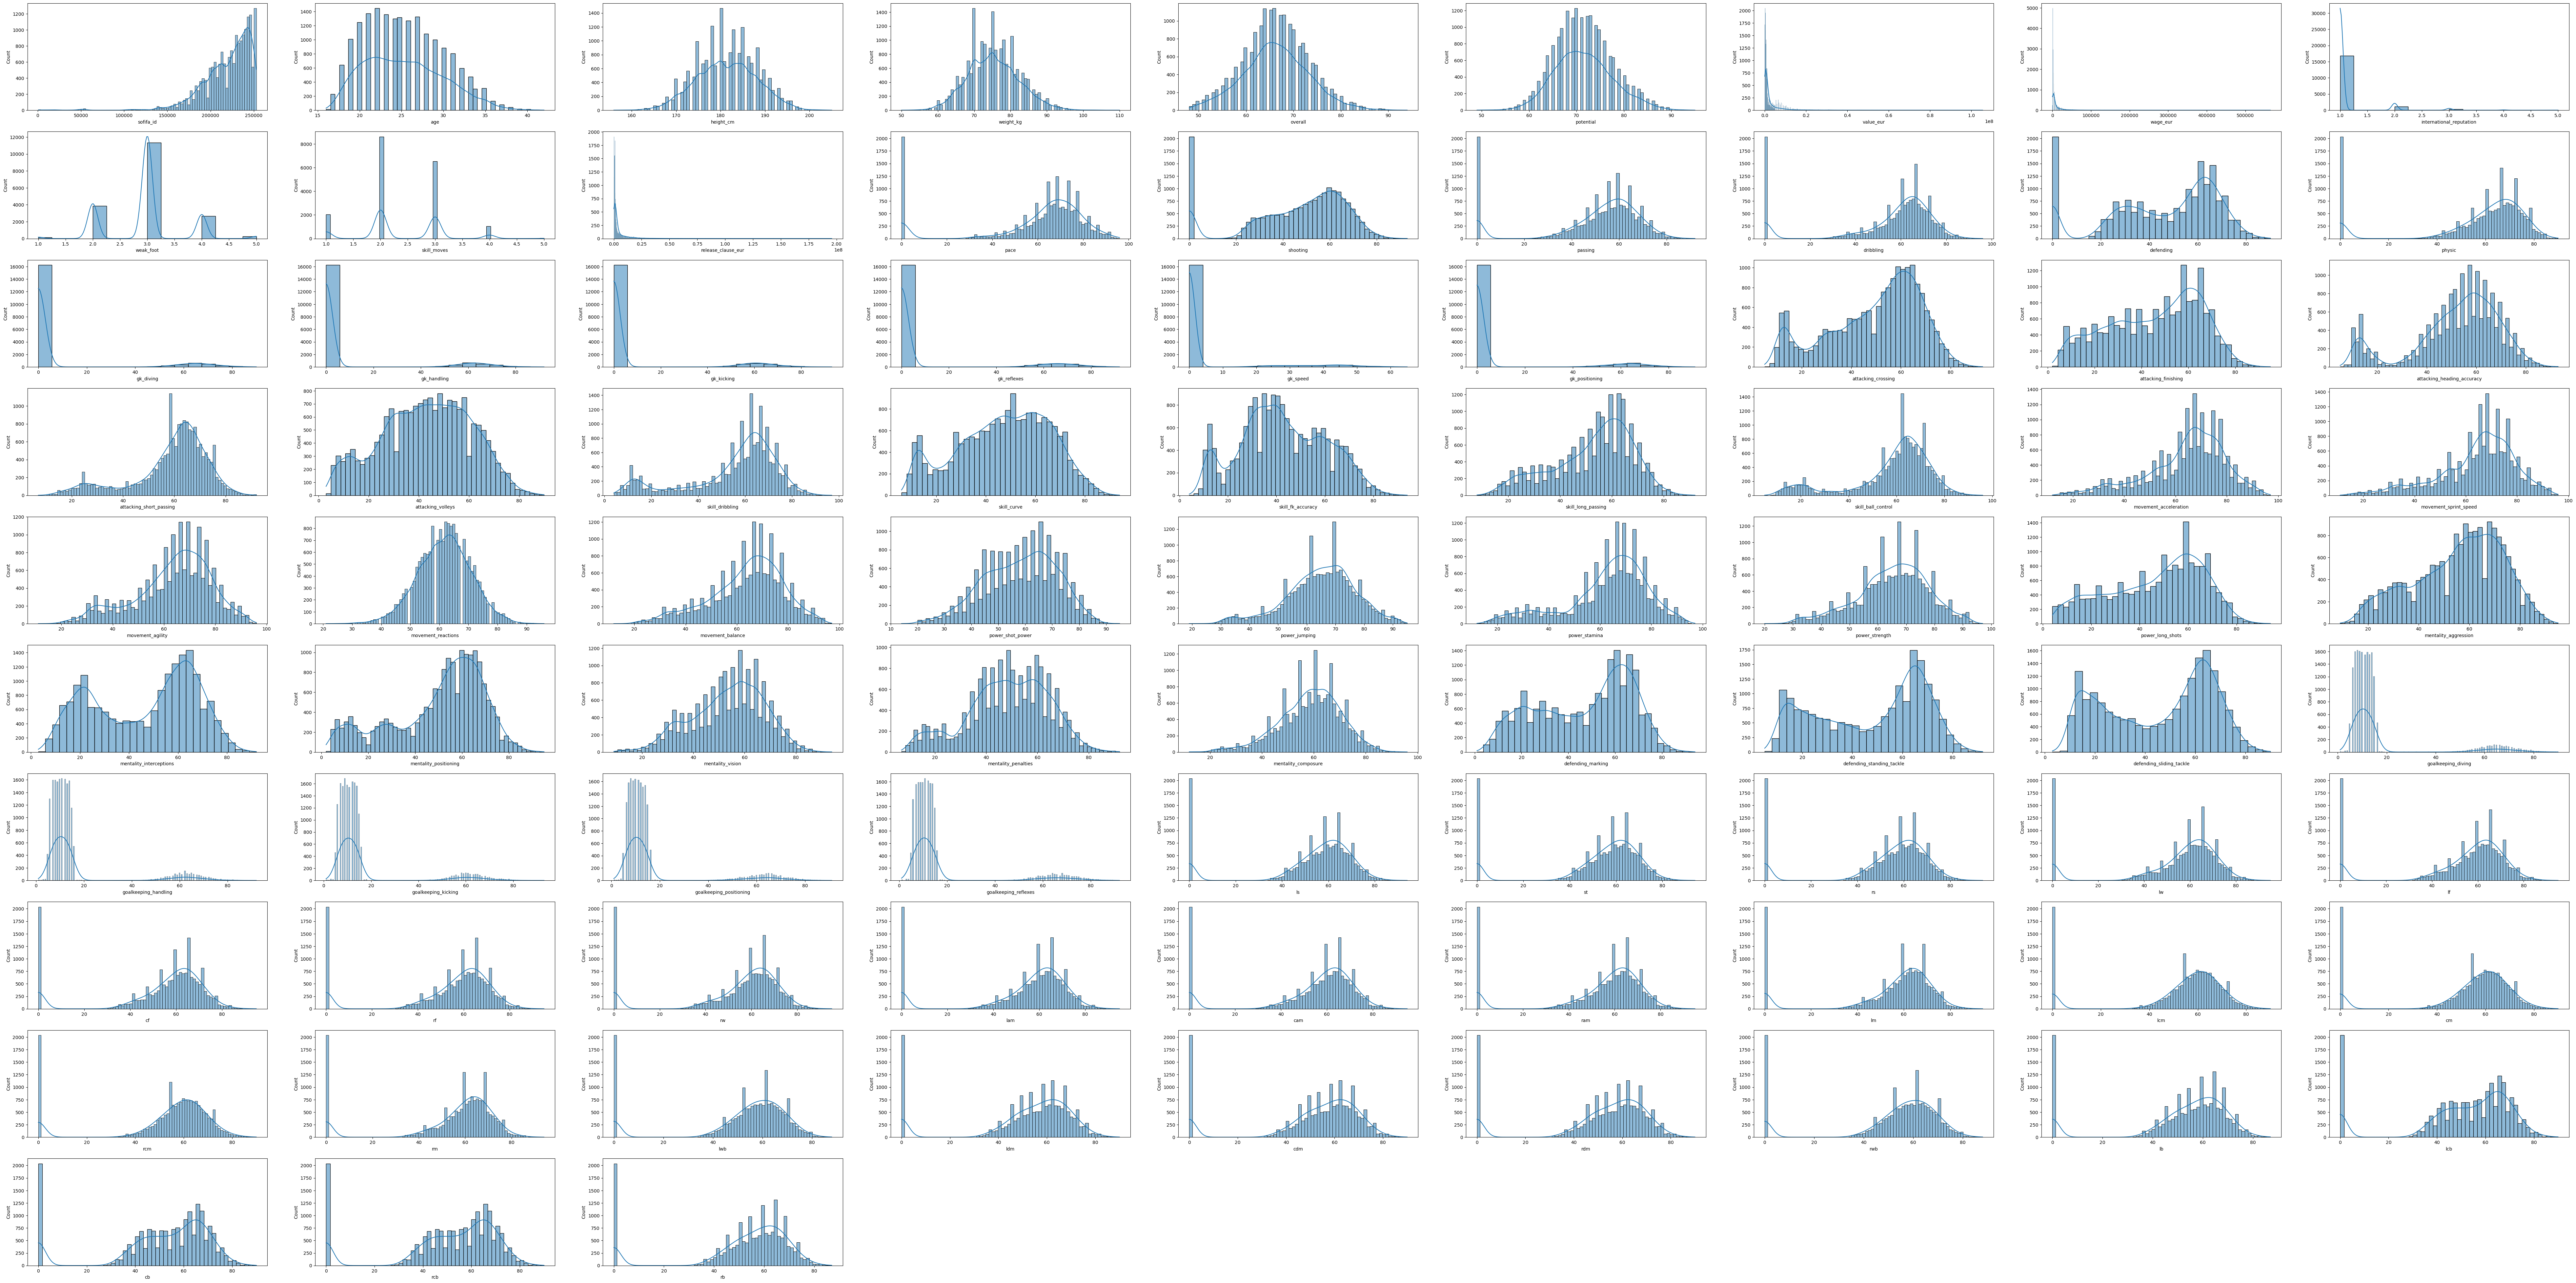

In [381]:
pltnum=1
plt.figure(figsize=(100,50))
for i in num_col:
    plt.subplot(10,9,pltnum)
    sns.histplot(x=df[i], kde=True)
    pltnum+=1

<Axes: xlabel='international_reputation', ylabel='overall'>

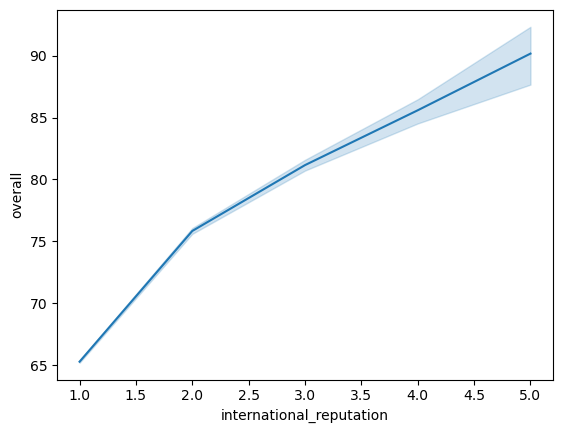

In [382]:
sns.lineplot(x='international_reputation', y='overall', data=df)

<Axes: xlabel='skill_moves', ylabel='overall'>

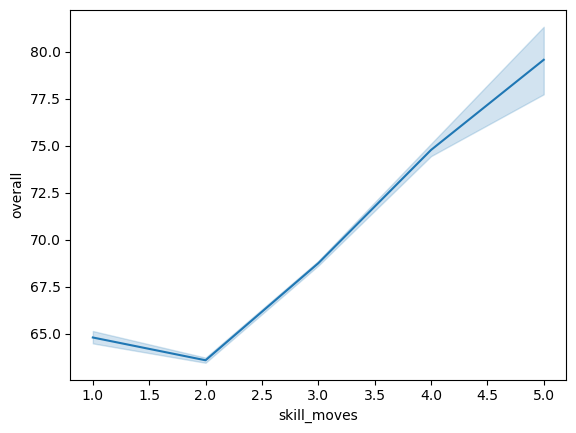

In [383]:
sns.lineplot(x='skill_moves', y='overall', data=df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

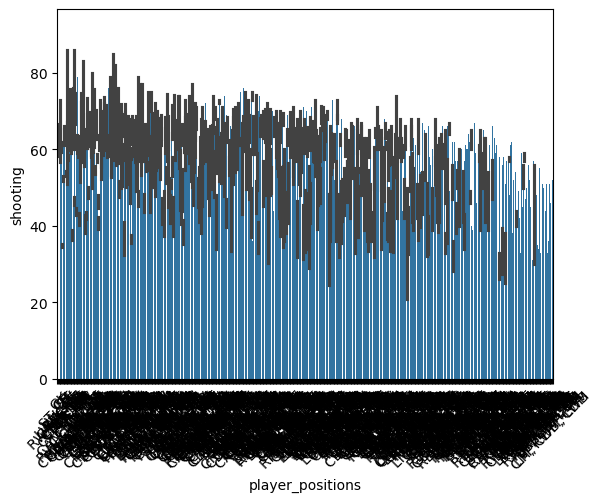

In [384]:
sns.barplot(x='player_positions', y='shooting', data=df)
plt.xticks(rotation=45)

<Axes: xlabel='overall', ylabel='wage_eur'>

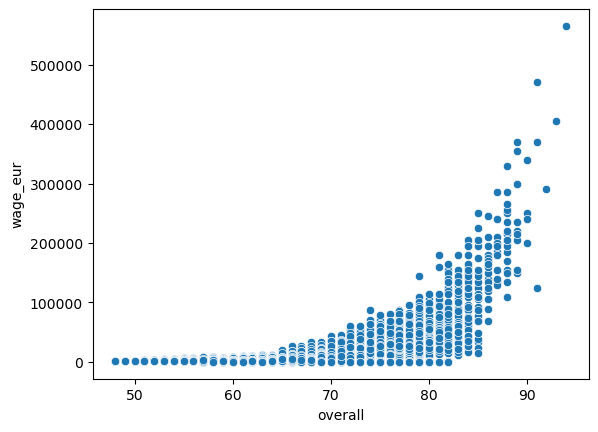

In [385]:
sns.scatterplot(x='overall', y='wage_eur', data=df)

so the wage increases with increase in overall score.
here wage is zero for some players. this can't happen.

In [386]:
df[df['wage_eur']==0]

sofifa_id                                         player_url  \
327       245309  https://sofifa.com/player/245309/egidio-maestr...   
328       245313  https://sofifa.com/player/245313/jose-maria-si...   
407       245299  https://sofifa.com/player/245299/jaime-nicolas...   
408       245304  https://sofifa.com/player/245304/saul-marcelo-...   
409       245305  https://sofifa.com/player/245305/luis-roberto-...   
...          ...                                                ...   
16353     251735  https://sofifa.com/player/251735/amanpreet-var...   
16354     251745  https://sofifa.com/player/251745/chapal-palan/...   
16356     252735  https://sofifa.com/player/252735/hristo-ivanov...   
16600     252359  https://sofifa.com/player/252359/eliezer-ira-t...   
16714     251750  https://sofifa.com/player/251750/dhwanil-singh...   

        short_name                long_name  age         dob  height_cm  \
327    E. Schetino  Egidio Maestre Schetino   27  1992-02-29        185   
328     J. Sildero       José María Sildero   27  1992-02-29        177   
407    J. Frendado   Jaime Nicolás Frendado   35  1984-02-29        181   
408      S. Ardero      Saúl Marcelo Ardero   31  1988-02-29        171   
409      L. Dálves      Luis Roberto Dálves   27  1992-02-29        188   
...            ...                      ...  ...         ...        ...   
16353    A. Varkay         Amanpreet Varkay   33  1985-08-18        179   
16354     C. Palan             Chapal Palan   28  1991-06-20        181   
16356    H. Ivanov            Hristo Ivanov   37  1982-04-06        176   
16600  E. Ira Tape         Eliezer Ira Tape   21  1997-08-31        192   
16714   D. Singhal          Dhwanil Singhal   34  1984-11-09        177   

       weight_kg  nationality           club  overall  potential  value_eur  \
327           80      Uruguay        Uruguay       82         82          0   
328           75      Uruguay        Uruguay       82         82          0   
407           82      Uruguay        Uruguay       81         81          0   
408           63      Uruguay        Uruguay       81         81          0   
409           83      Uruguay        Uruguay       81         81          0   
...          ...          ...            ...      ...        ...        ...   
16353         71        India          India       58         58          0   
16354         69        India          India       58         58          0   
16356         65     Bulgaria       Bulgaria       58         58          0   
16600         85  Ivory Coast  Côte d'Ivoire       57         66          0   
16714         71        India          India       57         57          0   

       wage_eur player_positions preferred_foot  international_reputation  \
327           0               CB          Right                         1   
328           0          CAM, RM          Right                         1   
407           0          CB, CDM          Right                         1   
408           0      CAM, LM, LW           Left                         1   
409           0           ST, CF          Right                         1   
...         ...              ...            ...                       ...   
16353         0               LB           Left                         1   
16354         0               CM          Right                         1   
16356         0               GK          Right                         1   
16600         0               GK          Right                         1   
16714         0              CDM          Right                         1   

       weak_foot  skill_moves      work_rate body_type real_face  \
327            3            2  Medium/Medium    Normal        No   
328            4            4     Medium/Low    Normal        No   
407            3            2    High/Medium    Normal        No   
408            5            4  Medium/Medium      Lean        No   
409            3            3       Hig

so for 240 players the wage is zero. this is not true. As we said during the EDA part, we will replace it with the median

In [387]:
df.loc[df.wage_eur==0 ,'wage_eur'] = np. median(df['wage_eur'])

now lets again check the plot:

In [388]:
df[df['wage_eur']==0]

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb]
Index: []

<Axes: xlabel='overall', ylabel='wage_eur'>

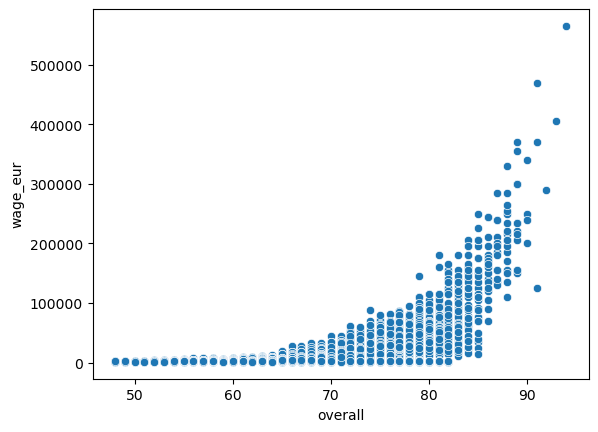

In [389]:
sns.scatterplot(x='overall', y='wage_eur', data=df)

In [566]:
#lets check the lowest wage_eur a player getting:
df['wage_eur'].min()

1000

so 1000 eur is the lowest wage a player getting

In [567]:
df.value_eur.min()

10000

this cant happen.let us check it in detail

In [392]:
df[df.value_eur==0]

sofifa_id                                         player_url  \
327       245309  https://sofifa.com/player/245309/egidio-maestr...   
328       245313  https://sofifa.com/player/245313/jose-maria-si...   
407       245299  https://sofifa.com/player/245299/jaime-nicolas...   
408       245304  https://sofifa.com/player/245304/saul-marcelo-...   
409       245305  https://sofifa.com/player/245305/luis-roberto-...   
...          ...                                                ...   
16354     251745  https://sofifa.com/player/251745/chapal-palan/...   
16356     252735  https://sofifa.com/player/252735/hristo-ivanov...   
16600     252359  https://sofifa.com/player/252359/eliezer-ira-t...   
16714     251750  https://sofifa.com/player/251750/dhwanil-singh...   
18233     182461  https://sofifa.com/player/182461/ting-zhou/20/...   

        short_name                long_name  age         dob  height_cm  \
327    E. Schetino  Egidio Maestre Schetino   27  1992-02-29        185   
328     J. Sildero       José María Sildero   27  1992-02-29        177   
407    J. Frendado   Jaime Nicolás Frendado   35  1984-02-29        181   
408      S. Ardero      Saúl Marcelo Ardero   31  1988-02-29        171   
409      L. Dálves      Luis Roberto Dálves   27  1992-02-29        188   
...            ...                      ...  ...         ...        ...   
16354     C. Palan             Chapal Palan   28  1991-06-20        181   
16356    H. Ivanov            Hristo Ivanov   37  1982-04-06        176   
16600  E. Ira Tape         Eliezer Ira Tape   21  1997-08-31        192   
16714   D. Singhal          Dhwanil Singhal   34  1984-11-09        177   
18233    Zhou Ting                       周挺   40  1979-02-05        182   

       weight_kg  nationality              club  overall  potential  \
327           80      Uruguay           Uruguay       82         82   
328           75      Uruguay           Uruguay       82         82   
407           82      Uruguay           Uruguay       81         81   
408           63      Uruguay           Uruguay       81         81   
409           83      Uruguay           Uruguay       81         81   
...          ...          ...               ...      ...        ...   
16354         69        India             India       58         58   
16356         65     Bulgaria          Bulgaria       58         58   
16600         85  Ivory Coast     Côte d'Ivoire       57         66   
16714         71        India             India       57         57   
18233         73     China PR  Dalian YiFang FC       49         49   

       value_eur  wage_eur player_positions preferred_foot  \
327            0      3000               CB          Right   
328            0      3000          CAM, RM          Right   
407            0      3000          CB, CDM          Right   
408            0      3000      CAM, LM, LW           Left   
409            0      3000           ST, CF          Right   
...          ...       ...              ...            ...   
16354          0      3000               CM          Right   
16356          0      3000               GK          Right   
16600          0      3000               GK          Right   
16714          0      3000              CDM          Right   
18233          0      1000           LB, RB          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
327                           1          3            2  Medium/Medium   
328                           1          4            4     Medium/Low   
407                           1          3            2    High/Medium   
408                           1          5            4  Medium/Medium   
409                           1          3            3       High/Low   
...                         ...        ...          ...            ...   
16354                         1          2            2     Medium/Low   
16356                         1          2            1  Medium

so 250 players value_eur has entered as zero. let us replace it with median

In [393]:
df.loc[df.value_eur==0, 'value_eur'] = np.median(df.value_eur)

In [394]:
df.value_eur.min()

10000

<Axes: xlabel='age', ylabel='overall'>

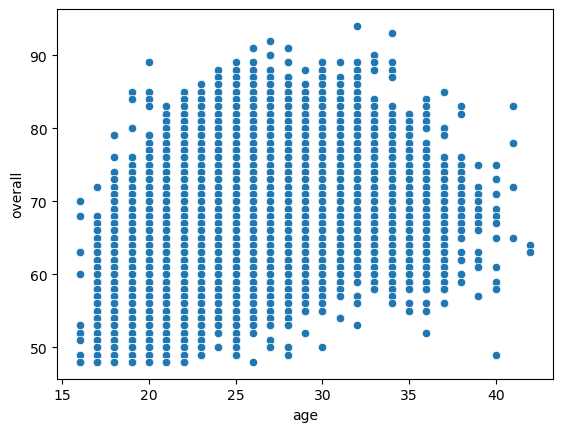

In [395]:
sns.scatterplot(x='age', y='overall', data=df)

The overall rating seems to be increasing from the age 15 to 30. After the age 30the overall rating seems to be decreasing.But still there are some players who have high overall rating even after that age. overall scores seems to cluster between 60 and 80 after this age, and fewer players have scores above 80.

In [396]:
print(f"max overall {df.overall.max()} and min overall {df.overall.min()}")

max overall 94 and min overall 48


In [397]:
# players whose overall and potential are same
df.loc[df.overall == df.potential]

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
5         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
18065     252855  https://sofifa.com/player/252855/wayne-horliso...   
18167     248852  https://sofifa.com/player/248852/ziya-alkurt/2...   
18168     252355  https://sofifa.com/player/252355/rodrigo-herna...   
18233     182461  https://sofifa.com/player/182461/ting-zhou/20/...   
18234     247775  https://sofifa.com/player/247775/junzhe-zhang/...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
4              E. Hazard                          Eden Hazard   28   
5           K. De Bruyne                      Kevin De Bruyne   28   
...                  ...                                  ...  ...   
18065        W. Horlison                       Wayne Horlison   27   
18167          Z. Alkurt                          Ziya Alkurt   28   
18168       R. Hernández                    Rodrigo Hernández   30   
18233          Zhou Ting                                   周挺   40   
18234       Zhang Junzhe                                  张俊哲   28   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
4      1991-01-07        175         74     Belgium   
5      1991-06-28        181         70     Belgium   
...           ...        ...        ...         ...   
18065  1992-02-29        180         75     England   
18167  1990-09-26        176         74      Turkey   
18168  1989-02-23        173         71      Mexico   
18233  1979-02-05        182         73    China PR   
18234  1991-02-20        183         69    China PR   

                              club  overall  potential  value_eur  wage_eur  \
0                     FC Barcelona       94         94   95500000    565000   
1                         Juventus       93         93   58500000    405000   
2              Paris Saint-Germain       92         92  105500000    290000   
4                      Real Madrid       91         91   90000000    470000   
5                  Manchester City       91         91   90000000    370000   
...                            ...      ...        ...        ...       ...   
18065                         Bury       51         51      40000      1000   
18167                  Kayserispor       50         50      30000      2000   
18168  Tiburones Rojos de Veracruz       50         50      30000      1000   
18233             Dalian YiFang FC       49         49     700000      1000   
18234       Hebei China Fortune FC       49         49      30000      2000   

      player_positions preferred_foot  international_reputation  weak_foot  \
0           RW, CF, ST           Left                         5          4   
1               ST, LW          Right                         5          4   
2              LW, CAM          Right                         5          5   
4               LW, CF          Right                         4          4   
5              CAM, CM          Right                         4          5   
...                ...            ...                       ...        ...   
18065               RM           Left                         1          3   
18167               RW           Left                         1          3   
1

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Medium/Low'),
  Text(1, 0, 'High/Low'),
  Text(2, 0, 'High/Medium'),
  Text(3, 0, 'Medium/Medium'),
  Text(4, 0, 'High/High'),
  Text(5, 0, 'Medium/High'),
  Text(6, 0, 'Low/High'),
  Text(7, 0, 'Low/Medium'),
  Text(8, 0, 'Low/Low')])

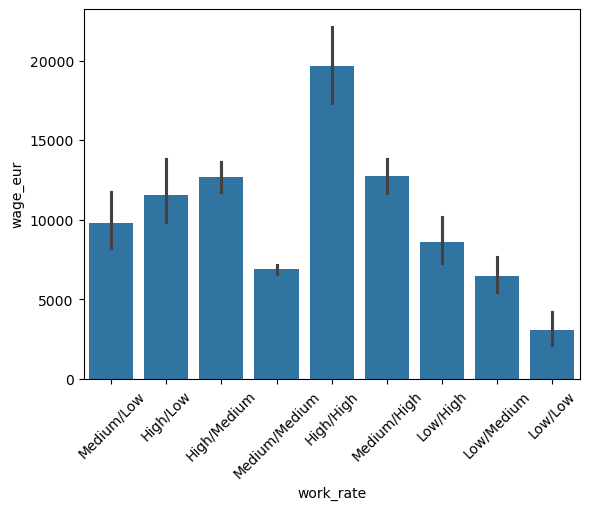

In [398]:
sns.barplot(x='work_rate',y='wage_eur', data=df)
plt.xticks(rotation=45)

players who have high work_rate has high wage_eur.

<function matplotlib.pyplot.show(close=None, block=None)>

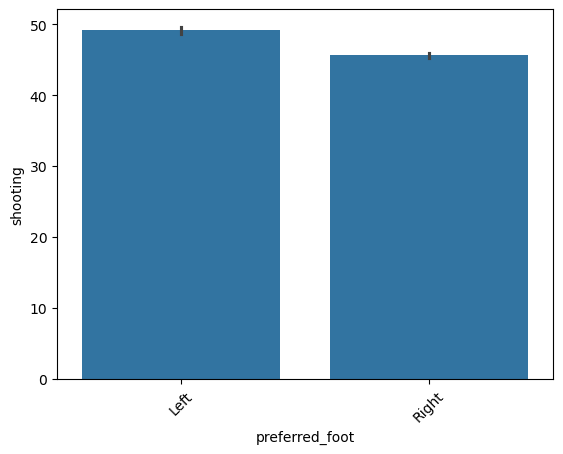

In [399]:
sns.barplot(x='preferred_foot',y='shooting', data=df)
plt.xticks(rotation=45)
plt.show

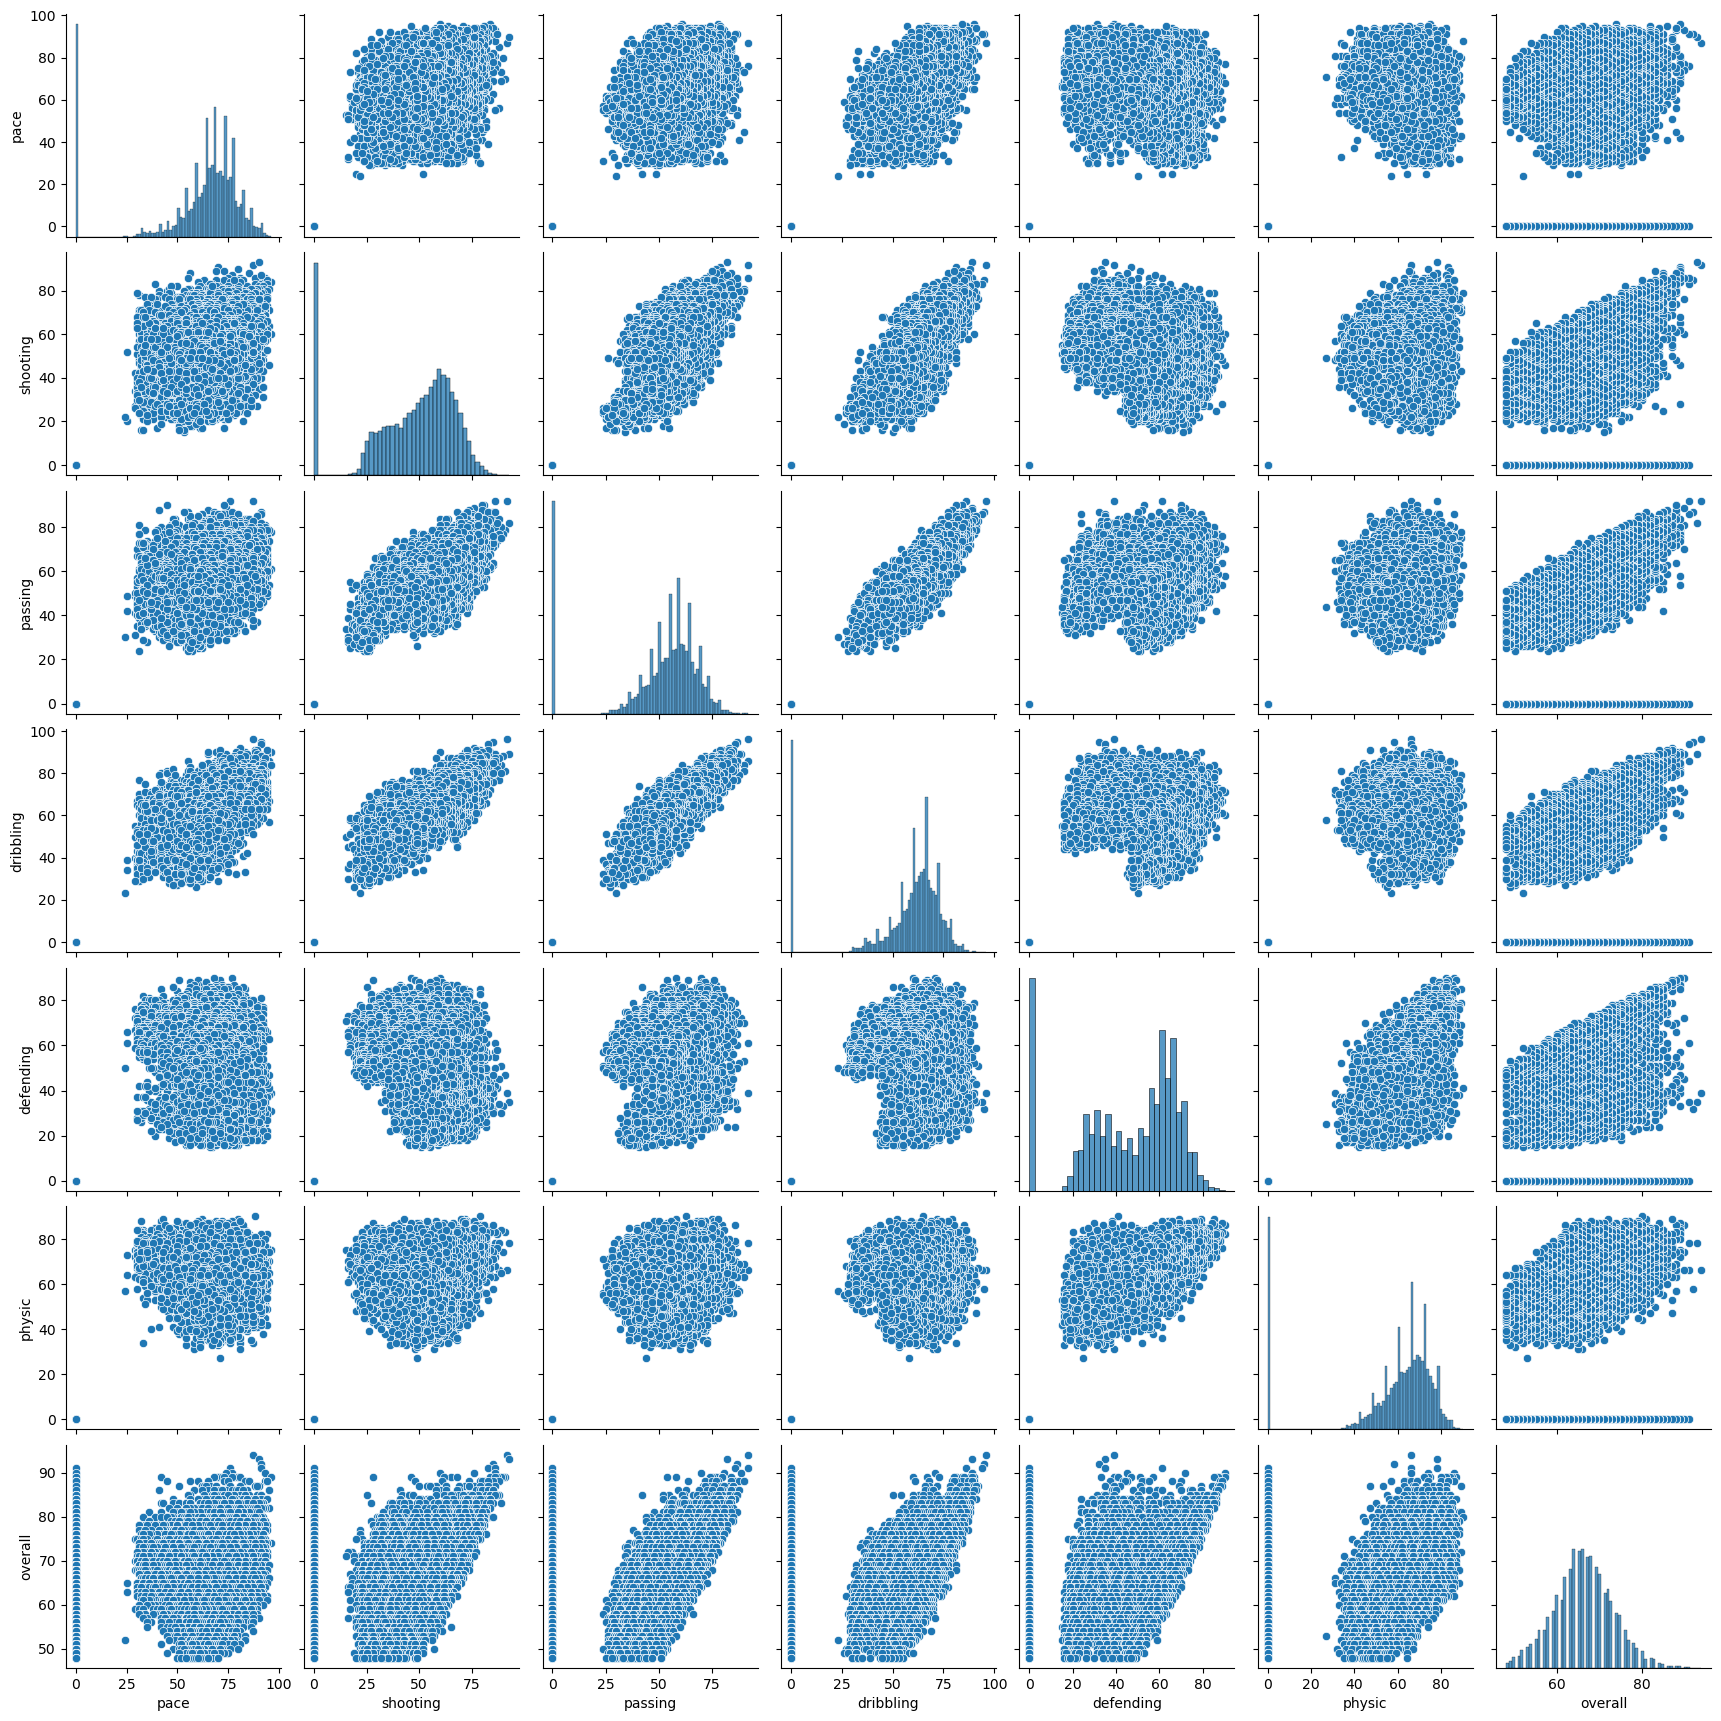

In [400]:
sns.pairplot(df[['pace','shooting','passing','dribbling','defending','physic', 'overall']])

here passing and dribbling shows a strong relation with overall. so those who have high passing and dribbling rate 
seems to have high overall score.

In [401]:
df.shape

(18278, 95)

so out of 18278 players , 5927 players overall and potential are same

In [402]:
df.nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Slovenia', 'Belgium',
       'Germany', 'Netherlands', 'Croatia', 'Egypt', 'France', 'Senegal',
       'England', 'Spain', 'Italy', 'Uruguay', 'Poland', 'Denmark',
       'Gabon', 'Korea Republic', 'Costa Rica', 'Slovakia',
       'Bosnia Herzegovina', 'Serbia', 'Scotland', 'Hungary',
       'Switzerland', 'Greece', 'Austria', 'Morocco', 'Sweden', 'Wales',
       'Colombia', 'Czech Republic', 'Chile', 'Algeria', 'Ivory Coast',
       'Togo', 'Norway', 'Mexico', 'Iceland', 'Finland', 'Jamaica',
       'Albania', 'Guinea', 'Cameroon', 'Ghana', 'Montenegro', 'Ukraine',
       'Russia', 'DR Congo', 'Central African Rep.', 'Venezuela',
       'Nigeria', 'Armenia', 'Israel', 'Ecuador', 'Paraguay', 'Australia',
       'Turkey', 'Romania', 'Japan', 'Mali', 'United States', 'Kosovo',
       'Dominican Republic', 'Tanzania', 'China PR', 'Northern Ireland',
       'Republic of Ireland', 'Tunisia', 'Cape Verde', 'FYR Macedonia',
       'Burkina Faso', 'Ke

1. Find clubs in each country

In [403]:
df.groupby('nationality')['club'].unique().reset_index() # getting the clubs for each nation

nationality                                               club
0          Afghanistan                             [SV Meppen, Stevenage]
1              Albania  [Lazio, Napoli, SPAL, Atalanta, Empoli, FC Bas...
2              Algeria  [Manchester City, Real Betis, Galatasaray SK, ...
3               Angola  [Lazio, SC Braga, Club Brugge KV, Alanyaspor, ...
4    Antigua & Barbuda  [Millwall, Stevenage, Accrington Stanley, Wyco...
..                 ...                                                ...
157          Venezuela  [Atlanta United, Dalian YiFang FC, Torino, FC ...
158            Vietnam                                [Sint-Truidense VV]
159              Wales  [Real Madrid, Juventus, Tottenham Hotspur, Bou...
160             Zambia  [FC Metz, FC Red Bull Salzburg, Orlando Pirate...
161           Zimbabwe  [Aston Villa, Kaizer Chiefs, Sparta Praha, Not...

[162 rows x 2 columns]

2.  Find the TOP 10 Players

In [404]:
# Sort the dataset by nationality and overall rating in descending order
df_sorted = df.sort_values(['nationality', 'overall'], ascending=[True, False])

# Group by nationality and take the top 10 players by overall rating in each nation
top_10_players_per_nation = df_sorted.groupby('nationality').head(10)

# Select relevant columns for display (nationality, short_name, overall)
top_10_players = top_10_players_per_nation[['nationality', 'short_name', 'overall']]

# Display the result
print(top_10_players)

       nationality    short_name  overall
11806  Afghanistan       H. Amin       64
14860  Afghanistan      N. Husin       60
242        Albania  T. Strakosha       82
443        Albania      E. Hysaj       80
1518       Albania    E. Berisha       76
...            ...           ...      ...
4875      Zimbabwe   T. Kadewere       70
8880      Zimbabwe     T. Hadebe       66
9757      Zimbabwe     M. Rusike       66
10117     Zimbabwe    M. Munetsi       65
14800     Zimbabwe      K. Benyu       60

[1160 rows x 3 columns]


In [405]:
TOP_players=top_10_players.sort_values('overall', ascending=False)

3. Prepare a rank ordered list of top 10 countries with most players. Which
countries are producing the most footballers that play at this level?

In [406]:
# Count the number of players for each nationality
players_per_country = df['nationality'].value_counts().reset_index()

In [407]:
players_per_country

nationality  count
0                England   1667
1                Germany   1216
2                  Spain   1035
3                 France    984
4              Argentina    886
..                   ...    ...
157              Liberia      1
158  São Tomé & Príncipe      1
159          Puerto Rico      1
160              Bahrain      1
161            Indonesia      1

[162 rows x 2 columns]

In [408]:
# Rename the columns for clarity
players_per_country.columns = ['nationality', 'num_players']

In [409]:
# Get the top 10 countries with the most players
top_10_countries = players_per_country.head(10)

# Display the result
print("TOP 10 COUNTRIES who has most number of players")
print(top_10_countries)

TOP 10 COUNTRIES who has most number of players
   nationality  num_players
0      England         1667
1      Germany         1216
2        Spain         1035
3       France          984
4    Argentina          886
5       Brazil          824
6        Italy          732
7     Colombia          591
8        Japan          453
9  Netherlands          416


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'England'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Spain'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Argentina'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'Colombia'),
  Text(8, 0, 'Japan'),
  Text(9, 0, 'Netherlands')])

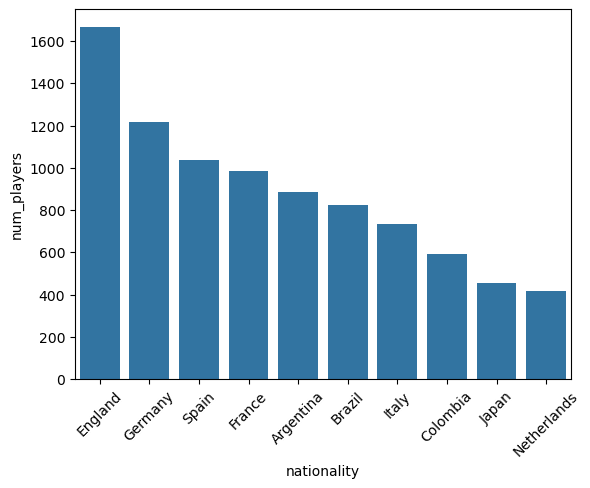

In [410]:
sns.barplot(x='nationality',y='num_players', data=top_10_countries)
plt.xticks(rotation=45)

so here England has most number of players which is more than 1600. Then comes Germany.

4. Which type of offensive players tends to get paid the most: the striker, the 
right-winger or the left-winger?

In [411]:
df_filtered=df[['st','lw','rw', 'wage_eur']]

In [412]:
df_filtered

st    lw    rw  wage_eur
0     91.00 95.00 95.00    565000
1     94.00 92.00 92.00    405000
2     87.00 93.00 93.00    290000
3      0.00  0.00  0.00    125000
4     86.00 92.00 92.00    470000
...     ...   ...   ...       ...
18273 34.00 33.00 33.00      2000
18274 35.00 35.00 35.00      2000
18275 45.00 45.00 45.00      1000
18276 45.00 47.00 47.00      1000
18277 44.00 46.00 46.00      2000

[18278 rows x 4 columns]

In [413]:
df_filtered.sort_values('wage_eur', ascending=False)

st    lw    rw  wage_eur
0     91.00 95.00 95.00    565000
4     86.00 92.00 92.00    470000
1     94.00 92.00 92.00    405000
5     85.00 90.00 90.00    370000
22    88.00 90.00 90.00    370000
...     ...   ...   ...       ...
14381 61.00 61.00 61.00      1000
14380  0.00  0.00  0.00      1000
14378  0.00  0.00  0.00      1000
14376 61.00 63.00 63.00      1000
12460 64.00 59.00 59.00      1000

[18278 rows x 4 columns]

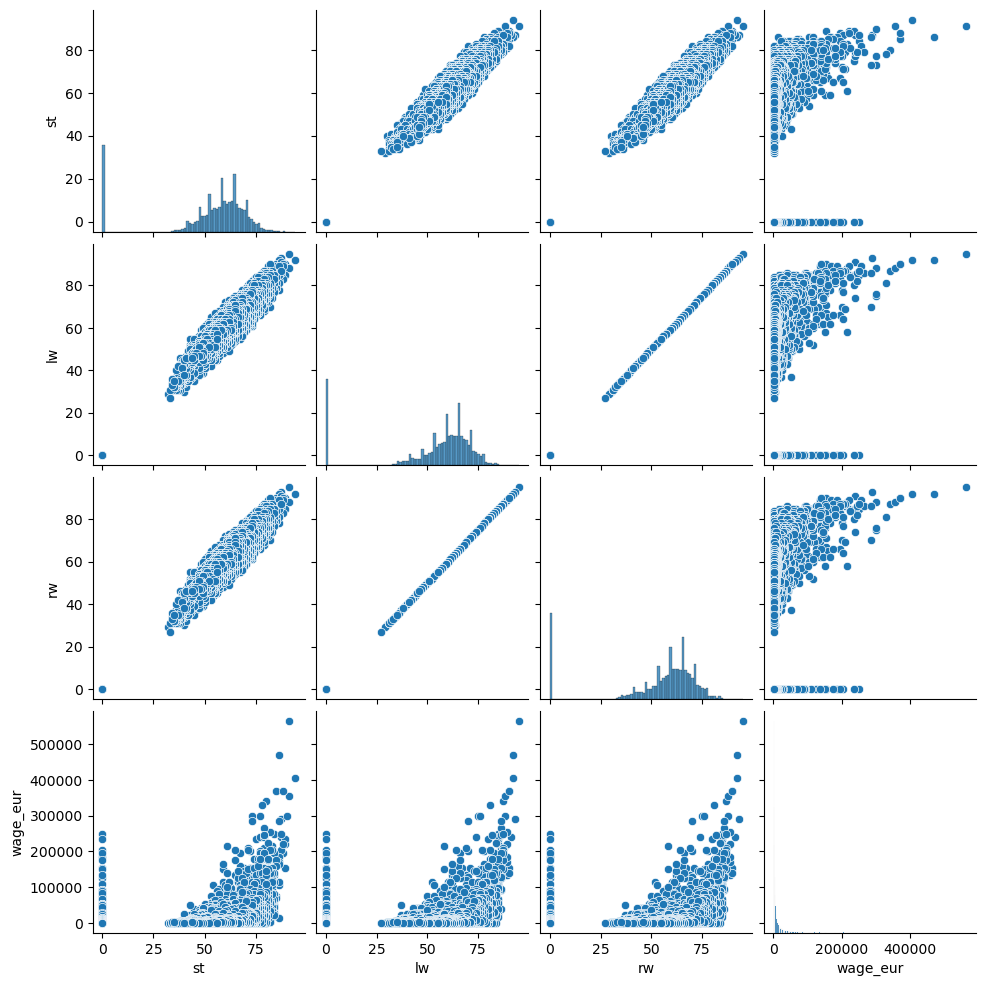

In [414]:
sns.pairplot(df_filtered)

so those who have high score for striker, left winger and right winger are getting paid most.

5. To conduct a historical comparison between Messi and Ronaldo using the FIFA player data (from FIFA 15 to FIFA 20):

In [415]:
players=df[df['short_name'].isin(['L. Messi', 'Cristiano Ronaldo'])]
players

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   

   height_cm  weight_kg nationality          club  overall  potential  \
0        170         72   Argentina  FC Barcelona       94         94   
1        187         83    Portugal      Juventus       93         93   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   

   international_reputation  weak_foot  skill_moves   work_rate   body_type  \
0                         5          4            4  Medium/Low       Messi   
1                         5          4            5    High/Low  C. Ronaldo   

  real_face  release_clause_eur  pace  shooting  passing  dribbling  \
0       Yes        195800000.00 87.00     92.00    92.00      96.00   
1       Yes         96500000.00 90.00     93.00    82.00      89.00   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0      39.00   66.00       0.00         0.00        0.00         0.00   
1      35.00   78.00       0.00         0.00        0.00         0.00   

   gk_speed  gk_positioning  attacking_crossing  attacking_finishing  \
0      0.00            0.00                  88                   95   
1      0.00            0.00                  84                   94   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87                  96                71                95   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             75              68                94   
1             95             85              78                93   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    48                       40                     94   
1                    63                       29                     95   

   mentality_vision  mentality_penalties  mentality_composure  \
0                94                   75                   96   
1                82                   85                   95   

   defending_marking  defending_standing_tackle  defending_sliding_tackle  \
0                 33                         37                        26   
1                 28                         32                        24   

   goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                   6                    11                   15   
1                   7                    11                   15   

   goalkeeping_positioning  goalkeeping_reflexes    ls    st    rs    lw  \
0                       14                     8 91.00 91.00 91.00 95.00   
1                       14                    11 94.00 94.00 94.00 92.00   

     lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm  \
0 

so Messi and Ronaldo  are in their 30's. Messi is playing for FC Barcelona and Ronaldo is for Juventus. Their overall score is 94 and 93 respecticely.They are not playing as Goalkeepers.

In [416]:
players[['short_name','pace', 'shooting','passing', 'dribbling', 'defending', 'physic']]

short_name  pace  shooting  passing  dribbling  defending  physic
0           L. Messi 87.00     92.00    92.00      96.00      39.00   66.00
1  Cristiano Ronaldo 90.00     93.00    82.00      89.00      35.00   78.00

6. Ideal budget to create a competitive team (at the level of top n teams in
Europe) and at which point the budget does not allow to buy significantly
better players for the 11-men lineup. An extra is the same comparison with
the Potential attribute for the lineup instead of the Overall attribute;

In [417]:
df_club=df.groupby('club')[['overall','potential']].mean().reset_index()

In [418]:
df_club=df_club.sort_values(['overall','potential'], ascending=False)
df_club

club  overall  potential
226  FC Bayern München    81.30      85.83
505        Real Madrid    80.12      85.73
350           Juventus    80.06      83.24
650            Uruguay    78.61      78.61
224       FC Barcelona    78.36      85.73
..                 ...      ...        ...
91    Bolton Wanderers    56.09      70.65
677       Waterford FC    55.85      63.55
175    Crewe Alexandra    55.80      66.40
275         Finn Harps    55.28      61.48
634            UCD AFC    53.43      64.62

[698 rows x 3 columns]

In [419]:
# so here let's take the top 10 teams:
df_club=df_club.head(10)
df_club

club  overall  potential
226    FC Bayern München    81.30      85.83
505          Real Madrid    80.12      85.73
350             Juventus    80.06      83.24
650              Uruguay    78.61      78.61
224         FC Barcelona    78.36      85.73
166             Colombia    78.00      83.00
426          Netherlands    78.00      82.00
407               Mexico    78.00      78.00
77   Bayer 04 Leverkusen    77.28      81.84
141              Chelsea    77.06      82.36

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'FC Bayern München'),
  Text(1, 0, 'Real Madrid'),
  Text(2, 0, 'Juventus'),
  Text(3, 0, 'Uruguay'),
  Text(4, 0, 'FC Barcelona'),
  Text(5, 0, 'Colombia'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'Mexico'),
  Text(8, 0, 'Bayer 04 Leverkusen'),
  Text(9, 0, 'Chelsea')])

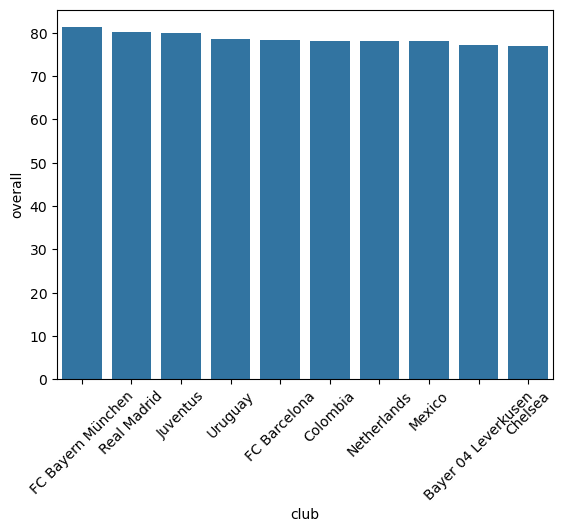

In [420]:
sns.barplot(x='club', y='overall', data=df_club)
plt.xticks(rotation=45)

In [421]:
df_sorted = df.sort_values(['overall'], ascending= [False])
df_sorted. head(5)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  pace  shooting  passing  \
0       Messi       Yes        195800000.00 87.00     92.00    92.00   
1  C. Ronaldo       Yes         96500000.00 90.00     93.00    82.00   
2      Neymar       Yes        195200000.00 91.00     85.00    87.00   
3      Normal       Yes        164700000.00  0.00      0.00     0.00   
4      Normal       Yes        184500000.00 91.00     83.00    86.00   

   dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0      96.00      39.00   66.00       0.00         0.00        0.00   
1      89.00      35.00   78.00       0.00         0.00        0.00   
2      95.00      32.00   58.00       0.00         0.00        0.00   
3       0.00       0.00    0.00      87.00        92.00       78.00   
4      94.00      35.00   66.00       0.00         0.00        0.00   

   gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0         0.00      0.00            0.00                  88   
1         0.00      0.00            0.00                  84   
2         0.00      0.00            0.00                  87   
3        89.00     52.00           90.00                  13   
4         0.00      0.00            0.00                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1             

In [422]:
top_11_players = df_sorted.groupby('club').head(11)
top_11_players

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
17185     247054  https://sofifa.com/player/247054/richie-ofarre...   
17184     246998  https://sofifa.com/player/246998/yoyo-mahdy/20...   
17159     247674  https://sofifa.com/player/247674/dennis-politi...   
17523     246990  https://sofifa.com/player/246990/joshua-collin...   
17482     234375  https://sofifa.com/player/234375/paul-doyle/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
17185       R. O'Farrell                     Richie O'Farrell   18   
17184           Y. Mahdy                           Yoyo Mahdy   21   
17159         D. Politic                       Dennis Politic   19   
17523         J. Collins                       Joshua Collins   22   
17482           P. Doyle                           Paul Doyle   21   

              dob  height_cm  weight_kg          nationality  \
0      1987-06-24        170         72            Argentina   
1      1985-02-05        187         83             Portugal   
2      1992-02-05        175         68               Brazil   
3      1993-01-07        188         87             Slovenia   
4      1991-01-07        175         74              Belgium   
...           ...        ...        ...                  ...   
17185  2000-09-08        185         78  Republic of Ireland   
17184  1998-01-20        178         73  Republic of Ireland   
17159  2000-03-05        189         77              Romania   
17523  1997-06-27        182         77  Republic of Ireland   
17482  1998-04-10        177         73  Republic of Ireland   

                      club  overall  potential  value_eur  wage_eur  \
0             FC Barcelona       94         94   95500000    565000   
1                 Juventus       93         93   58500000    405000   
2      Paris Saint-Germain       92         92  105500000    290000   
3          Atlético Madrid       91         93   77500000    125000   
4              Real Madrid       91         91   90000000    470000   
...                    ...      ...        ...        ...       ...   
17185              UCD AFC       55         69     160000      1000   
17184              UCD AFC       55         69     180000      1000   
17159     Bolton Wanderers       55         70     170000      1000   
17523              UCD AFC       54         64     100000      1000   
17482              UCD AFC       54         66     120000      1000   

      player_positions preferred_foot  international_reputation  weak_foot  \
0           RW, CF, ST           Left                         5          4   
1               ST, LW          Right                         5          4   
2              LW, CAM          Right                         5          5   
3                   GK          Right                         3          3   
4               LW, CF          Right                         4          4   
...                ...            ...                       ...        ...   
17185          CAM, CM          Right                         1          3   
17184               ST          Right                         1    

In [423]:
# Step 4: Calculate total and average transfer value for the top 11 players per team
team_budget = top_11_players.groupby('club').agg(
    total_budget=('value_eur', 'sum'),  # Total value of top 11 players
    avg_value=('value_eur', 'mean'),    # Average transfer value of top 11 players
    avg_overall=('overall', 'mean') # Average overall rating of top 11 players
).reset_index()

In [424]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [425]:
team_budget

club  total_budget  avg_value  avg_overall
0      SSV Jahn Regensburg      12350000 1122727.27        68.64
1    1. FC Heidenheim 1846      22850000 2077272.73        70.64
2     1. FC Kaiserslautern       9075000  825000.00        66.64
3               1. FC Köln     109000000 9909090.91        77.00
4          1. FC Magdeburg       9000000  818181.82        67.27
..                     ...           ...        ...          ...
693         Zagłębie Lubin       8160000  741818.18        66.36
694        Çaykur Rizespor      34200000 3109090.91        71.64
695              Örebro SK       6215000  565000.00        65.64
696          Östersunds FK       6900000  627272.73        65.09
697          Śląsk Wrocław        140000  140000.00        57.00

[698 rows x 4 columns]


6. Sample analysis of top n% players (e.g. top 5% of the player) to see if some
important attributes such as Agility or BallControl or Strength have been
popular or not across the FIFA versions. An example would be seeing that
the top 5% players of FIFA 20 are faster (higher Acceleration and Agility)
compared to FIFA 15. The trend of attributes is also an important indication
of how some attributes are necessary for players to win games (a version
with more top 5% players with high BallControl stats would indicate that the
game is more focused on the technique rather than the physical aspect).

In [426]:
df_sort =df.sort_values('overall', ascending=False)
df_sort

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18250     238550  https://sofifa.com/player/238550/rowan-roache/...   
18251     245408  https://sofifa.com/player/245408/george-sykes-...   
18252     248851  https://sofifa.com/player/248851/asim-aksungur...   
18253     250739  https://sofifa.com/player/250739/nathan-morley...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

               short_name                            long_name  age  \
0                L. Messi       Lionel Andrés Messi Cuccittini   32   
1       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2               Neymar Jr        Neymar da Silva Santos Junior   27   
3                J. Oblak                            Jan Oblak   26   
4               E. Hazard                          Eden Hazard   28   
...                   ...                                  ...  ...   
18250           R. Roache                         Rowan Roache   19   
18251  G. Sykes-Kenworthy               George Sykes-Kenworthy   19   
18252         A. Aksungur                        Asim Aksungur   18   
18253           N. Morley                        Nathan Morley   18   
18277          Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg          nationality  \
0      1987-06-24        170         72            Argentina   
1      1985-02-05        187         83             Portugal   
2      1992-02-05        175         68               Brazil   
3      1993-01-07        188         87             Slovenia   
4      1991-01-07        175         74              Belgium   
...           ...        ...        ...                  ...   
18250  2000-02-09        178         74  Republic of Ireland   
18251  1999-10-01        182         78              England   
18252  2000-10-08        175         72               Turkey   
18253  2000-09-12        178         60              England   
18277  1993-01-11        182         78             China PR   

                         club  overall  potential  value_eur  wage_eur  \
0                FC Barcelona       94         94   95500000    565000   
1                    Juventus       93         93   58500000    405000   
2         Paris Saint-Germain       92         92  105500000    290000   
3             Atlético Madrid       91         93   77500000    125000   
4                 Real Madrid       91         91   90000000    470000   
...                       ...      ...        ...        ...       ...   
18250               Blackpool       48         65      60000      1000   
18251           Bradford City       48         65      50000      1000   
18252             Denizlispor       48         65      60000      1000   
18253           Burton Albion       48         65      60000      1000   
18277  Hebei China Fortune FC       48         51      40000      2000   

      player_positions preferred_foot  international_reputation  weak_foot  \
0           RW, CF, ST           Left                         5          4   
1               ST, LW          Right                         5          4   
2              LW, CAM          Right                         5          5   
3                   GK          Right                         3          3   
4               LW, CF          Right                         4          4   
...                ...            ...                       ...        ...   
18250               ST          Right                         1          3   
18251              

In [427]:
#select top 5 % players
top_5Perc = int(len(df_sort)*0.05)

In [428]:
df_sort =df_sort.nlargest(top_5Perc, 'overall')
df_sort[['short_name','movement_acceleration','movement_agility', 'power_strength']]

short_name  movement_acceleration  movement_agility  \
0             L. Messi                     91                93   
1    Cristiano Ronaldo                     89                87   
2            Neymar Jr                     94                96   
3             J. Oblak                     43                67   
4            E. Hazard                     94                95   
..                 ...                    ...               ...   
754            I. Sarr                     95                79   
755            D. Rice                     60                53   
756         F. Neuhaus                     74                79   
757         M. Zaracho                     89                93   
758              Ferro                     44                41   

     power_strength  
0                68  
1                78  
2                49  
3                78  
4                63  
..              ...  
754              66  
755              76  
756              65  
757              56  
758              74  

[913 rows x 4 columns]

In [429]:
df_sort.groupby('short_name')[['short_name','movement_acceleration','movement_agility','power_strength']].head()

short_name  movement_acceleration  movement_agility  \
0             L. Messi                     91                93   
1    Cristiano Ronaldo                     89                87   
2            Neymar Jr                     94                96   
3             J. Oblak                     43                67   
4            E. Hazard                     94                95   
..                 ...                    ...               ...   
754            I. Sarr                     95                79   
755            D. Rice                     60                53   
756         F. Neuhaus                     74                79   
757         M. Zaracho                     89                93   
758              Ferro                     44                41   

     power_strength  
0                68  
1                78  
2                49  
3                78  
4                63  
..              ...  
754              66  
755              76  
756              65  
757              56  
758              74  

[913 rows x 4 columns]

### Checking outliers

In [559]:
len(df.columns)

79

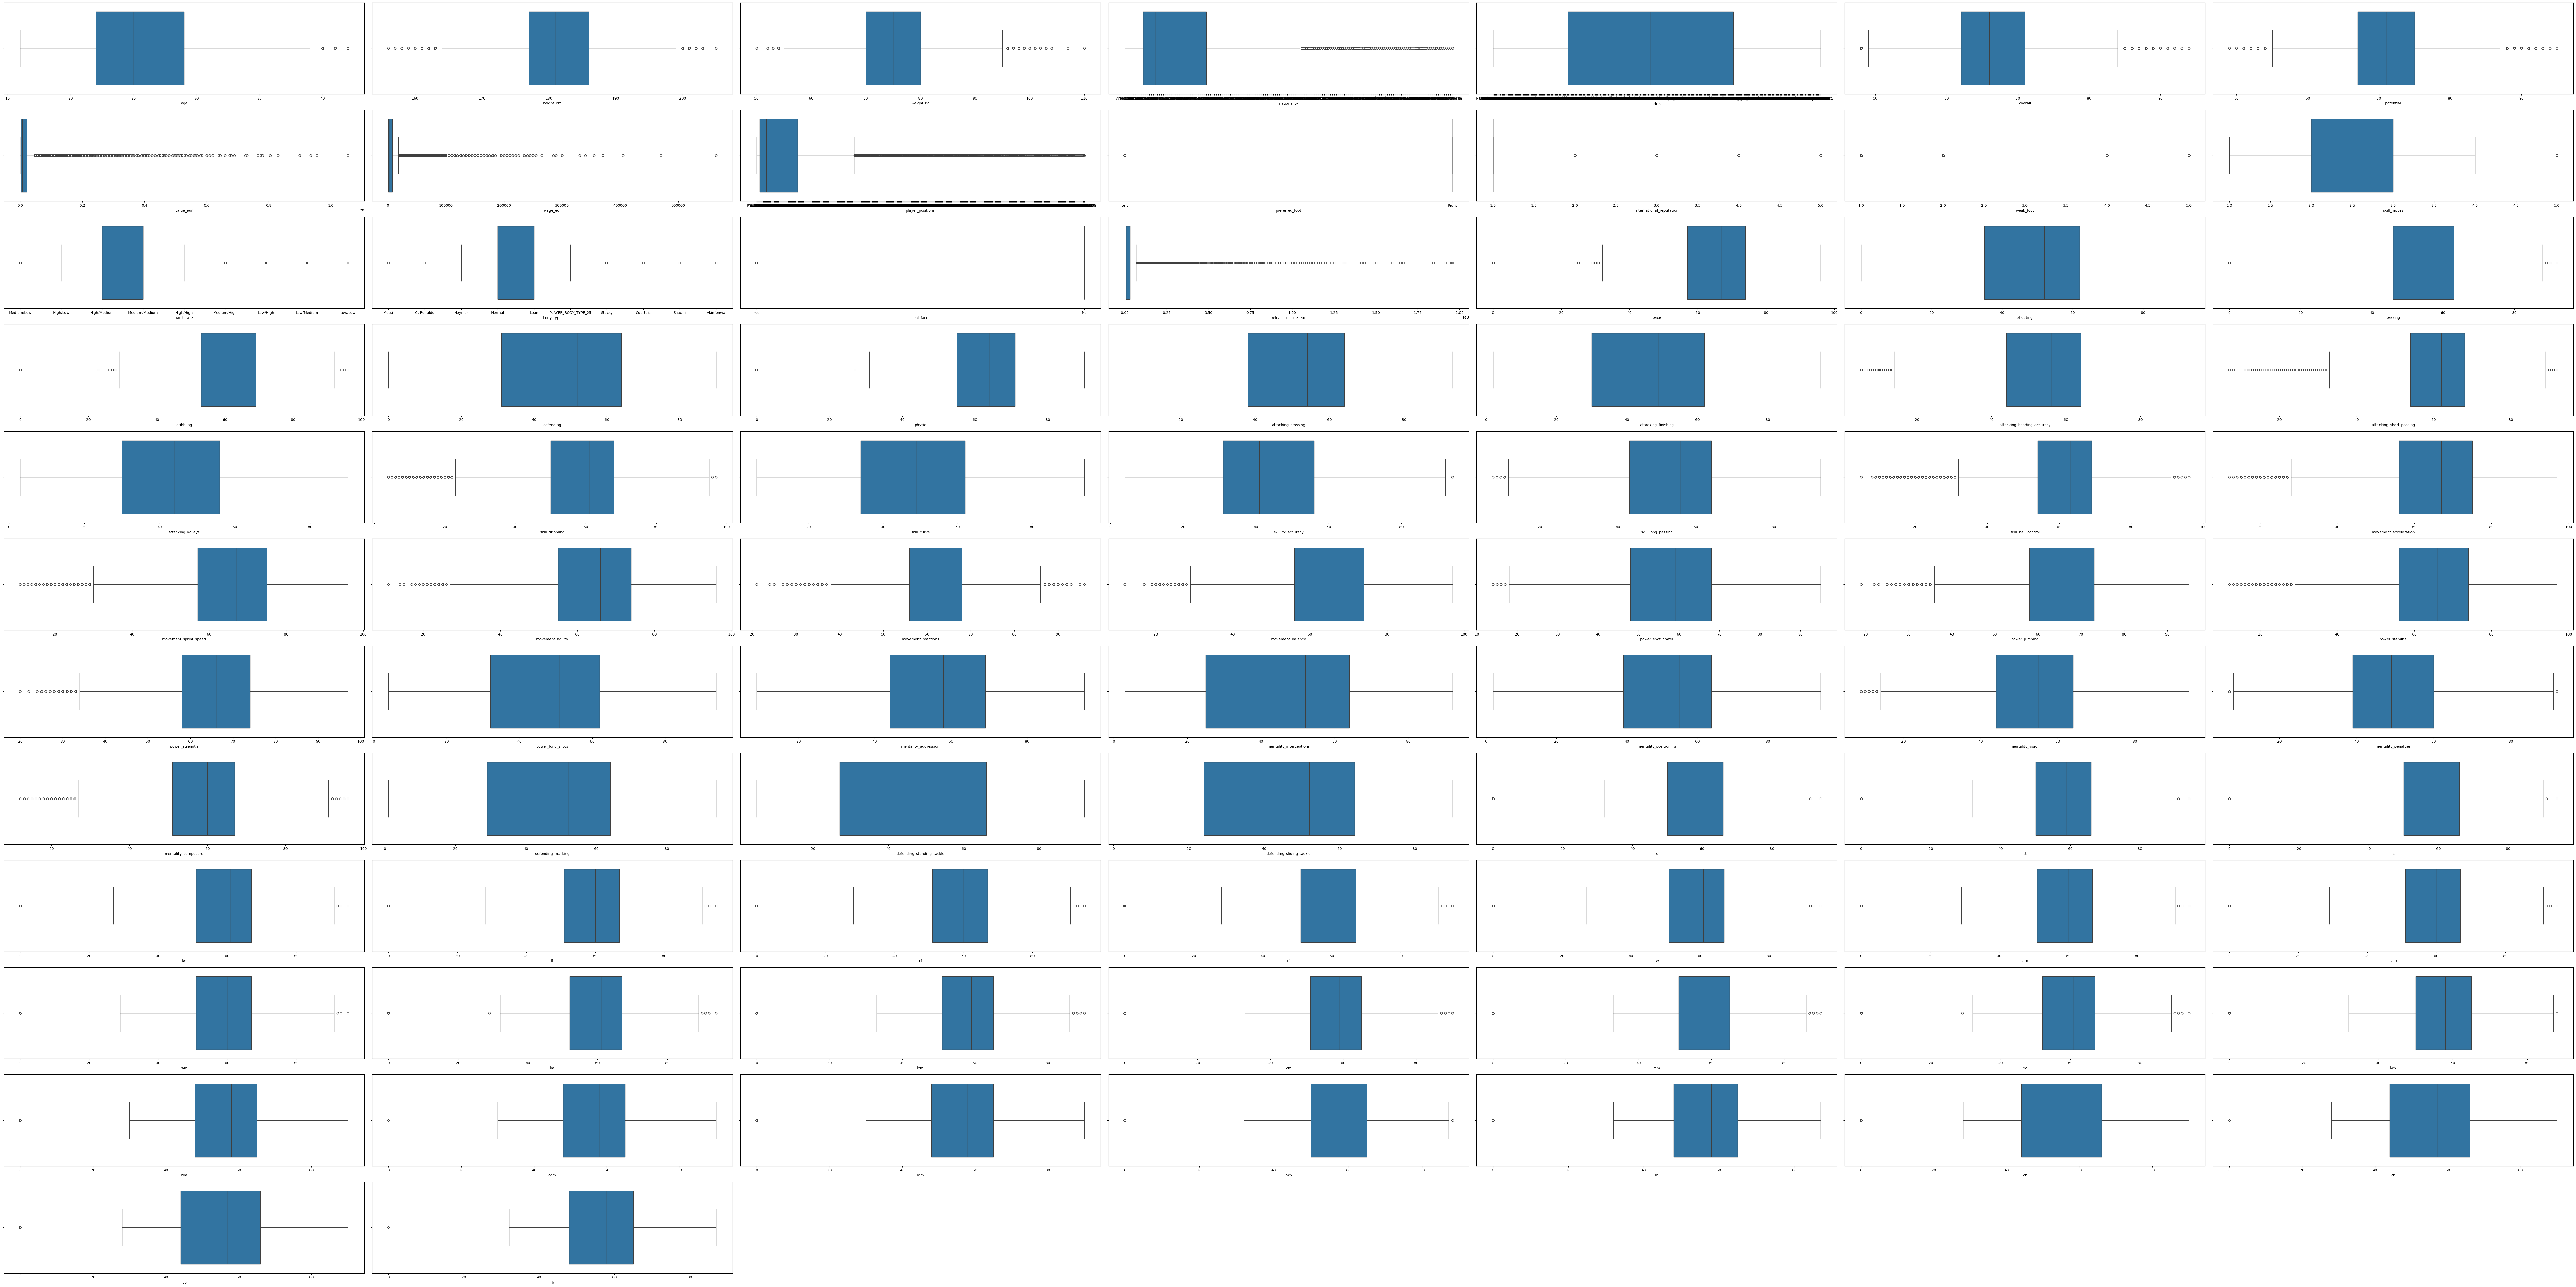

In [565]:

plt.figure(figsize=(100,50))
pltnum=1

for i in df.columns:
    plt.subplot(12,7,pltnum)
    sns.boxplot(x=df[i], data=df)
    pltnum+=1
    plt.tight_layout()  # Adjust layout for better visualization
    plt.show

### checking how features are correlated

In [432]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=['number'])
numeric_data

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0         158023   32        170         72       94         94   95500000   
1          20801   34        187         83       93         93   58500000   
2         190871   27        175         68       92         92  105500000   
3         200389   26        188         87       91         93   77500000   
4         183277   28        175         74       91         91   90000000   
...          ...  ...        ...        ...      ...        ...        ...   
18273     245006   22        186         79       48         56      40000   
18274     250995   22        177         66       48         56      40000   
18275     252332   19        186         75       48         56      40000   
18276     251110   18        185         74       48         54      40000   
18277     233449   26        182         78       48         51      40000   

       wage_eur  international_reputation  weak_foot  skill_moves  \
0        565000                         5          4            4   
1        405000                         5          4            5   
2        290000                         5          5            5   
3        125000                         3          3            1   
4        470000                         4          4            4   
...         ...                       ...        ...          ...   
18273      2000                         1          3            2   
18274      2000                         1          2            2   
18275      1000                         1          2            2   
18276      1000                         1          2            2   
18277      2000                         1          3            2   

       release_clause_eur  pace  shooting  passing  dribbling  defending  \
0            195800000.00 87.00     92.00    92.00      96.00      39.00   
1             96500000.00 90.00     93.00    82.00      89.00      35.00   
2            195200000.00 91.00     85.00    87.00      95.00      32.00   
3            164700000.00  0.00      0.00     0.00       0.00       0.00   
4            184500000.00 91.00     83.00    86.00      94.00      35.00   
...                   ...   ...       ...      ...        ...        ...   
18273            70000.00 57.00     23.00    28.00      33.00      47.00   
18274            72000.00 58.00     24.00    33.00      35.00      48.00   
18275            70000.00 54.00     35.00    44.00      45.00      48.00   
18276            70000.00 59.00     35.00    47.00      47.00      45.00   
18277          1100000.00 60.00     32.00    51.00      45.00      47.00   

       physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0       66.00       0.00         0.00        0.00         0.00      0.00   
1       78.00       0.00         0.00        0.00         0.00      0.00   
2       58.00       0.00         0.00        0.00         0.00      0.00   
3        0.00      87.00        92.00       78.00        89.00     52.00   
4       66.00       0.00         0.00        0.00         0.00      0.00   
...       ...        ...          ...         ...          ...       ...   
18273   51.00       0.00         0.00        0.00         0.00      0.00   
18274   48.00       0.00         0.00        0.00         0.00      0.00   
18275   51.00       0.00         0.00        0.00         0.00      0.00   
18276   52.00       0.00         0.00        0.00         0.00      0.00   
18277   55.00       0.00         0.00        0.00         0.00      0.00   

       gk_positioning  attacking_crossing  attacking_finishing  \
0                0.00                  88                   95   
1                0.00                  84                   94   
2                0.00                  87                   87   
3               90.00                  13                   11   
4                0.00                  81                   84   
...               .

In [446]:
pd.set_option("display.max_rows", None)
corr_matrix= numeric_data.corr()
corr_matrix

sofifa_id   age  height_cm  weight_kg  overall  \
sofifa_id                        1.00 -0.74      -0.09      -0.20    -0.45   
age                             -0.74  1.00       0.08       0.24     0.46   
height_cm                       -0.09  0.08       1.00       0.77     0.04   
weight_kg                       -0.20  0.24       0.77       1.00     0.16   
overall                         -0.45  0.46       0.04       0.16     1.00   
potential                        0.04 -0.26      -0.00      -0.01     0.65   
value_eur                       -0.16  0.08       0.01       0.05     0.64   
wage_eur                        -0.23  0.15       0.02       0.07     0.57   
international_reputation        -0.36  0.26       0.04       0.09     0.48   
weak_foot                       -0.09  0.07      -0.18      -0.13     0.23   
skill_moves                     -0.08  0.05      -0.43      -0.35     0.40   
release_clause_eur              -0.14  0.07       0.01       0.05     0.61   
pace                             0.14 -0.15      -0.51      -0.46     0.13   
shooting                        -0.09  0.08      -0.40      -0.32     0.35   
passing                         -0.09  0.08      -0.45      -0.37     0.37   
dribbling                       -0.02 -0.00      -0.50      -0.42     0.31   
defending                       -0.08  0.11      -0.13      -0.11     0.27   
physic                          -0.07  0.10      -0.16      -0.09     0.26   
gk_diving                       -0.10  0.09       0.37       0.34    -0.03   
gk_handling                     -0.10  0.10       0.37       0.34    -0.03   
gk_kicking                      -0.10  0.09       0.37       0.34    -0.04   
gk_reflexes                     -0.10  0.09       0.37       0.34    -0.03   
gk_speed                        -0.12  0.11       0.35       0.33    -0.02   
gk_positioning                  -0.11  0.10       0.37       0.34    -0.02   
attacking_crossing              -0.14  0.13      -0.50      -0.40     0.39   
attacking_finishing             -0.10  0.08      -0.38      -0.29     0.34   
attacking_heading_accuracy      -0.12  0.15       0.01       0.04     0.35   
attacking_short_passing         -0.15  0.14      -0.37      -0.29     0.50   
attacking_volleys               -0.17  0.14      -0.35      -0.26     0.39   
skill_dribbling                 -0.05  0.02      -0.50      -0.42     0.37   
skill_curve                     -0.17  0.14      -0.45      -0.35     0.42   
skill_fk_accuracy               -0.20  0.19      -0.41      -0.31     0.39   
skill_long_passing              -0.20  0.18      -0.34      -0.26     0.49   
skill_ball_control              -0.11  0.09      -0.43      -0.34     0.46   
movement_acceleration            0.12 -0.15      -0.56      -0.49     0.19   
movement_sprint_speed            0.12 -0.14      -0.47      -0.42     0.20   
movement_agility                -0.03 -0.02      -0.63      -0.55     0.25   
movement_reactions              -0.44  0.46      -0.02       0.09     0.86   
movement_balance                 0.04 -0.09      -0.79      -0.67     0.10   
power_shot_power                -0.28  0.26      -0.17      -0.06     0.57   
power_jumping                   -0.19  0.19      -0.04       0.03     0.27   
power_stamina                   -0.08  0.12      -0.29      -0.22     0.37   
power_strength                  -0.28  0.34       0.54       0.61     0.36   
power_long_shots                -0.18  0.16      -0.38      -0.28     0.43   
mentality_aggression            -0.23  0.26      -0.05       0.03     0.40   
mentality_interceptions         -0.16  0.20      -0.05      -0.03     0.32   
mentality_positioning           -0.10  0.09      -0.45      -0.36     0.36   
mentality_vision                -0.23  0.20      -0.37      -0.28     0.51   
mentality_penalties             -0.15  0.14      -0.34      -0.25     0.35   
mentality_composure             -0.39  0.37      -0.16      -0.05     0.72   
defending_marking               -0.13  0.16      -

<Axes: >

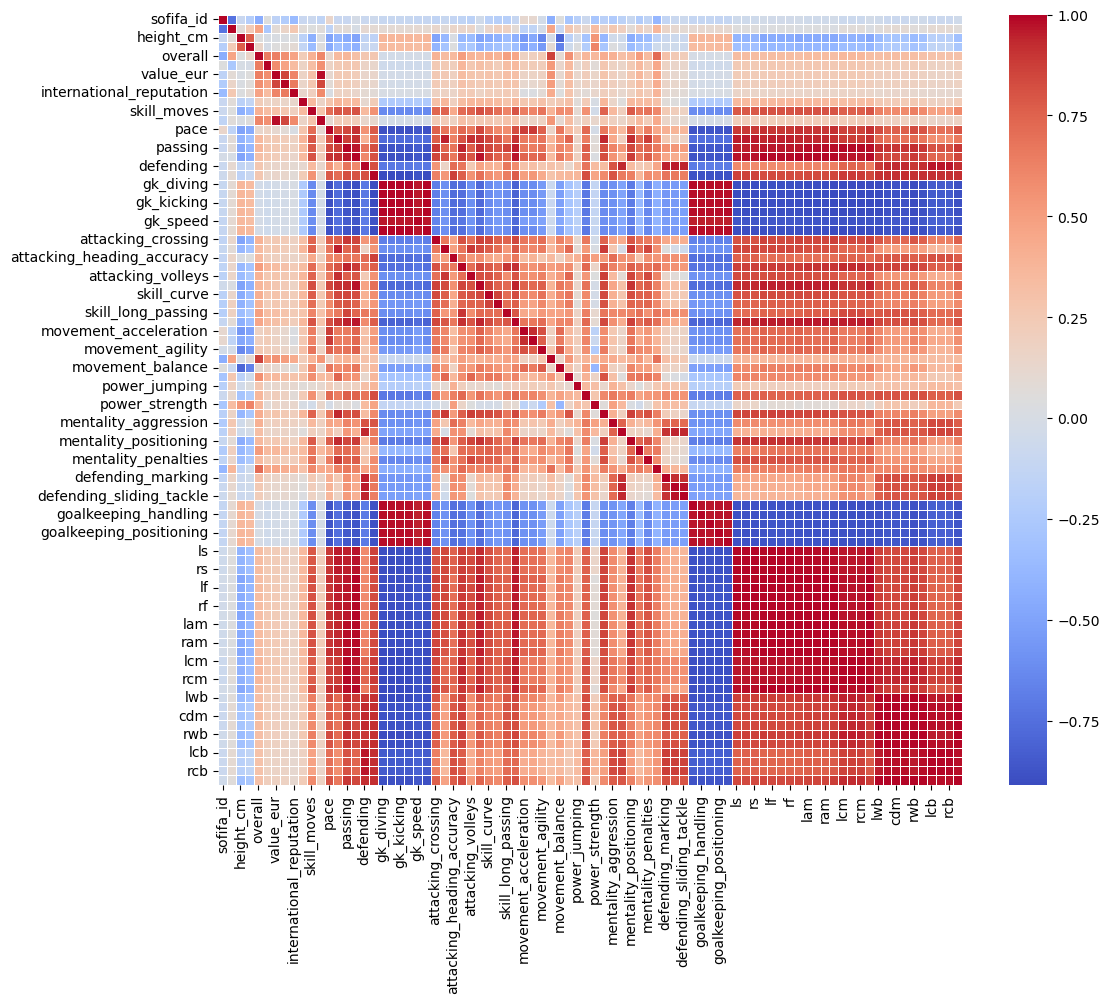

In [436]:
plt.figure(figsize=(12, 10))  # Adjust width and height as needed

# Create the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

## feature selection

here sofifaID, player_url,short_name,long_name,dob, is not needed for clustering. so we can drop it from the dataframe.

features ls to rcb are strongly negatively correlated with gk_diving,handling,gk_kicking,reflexes,gk_speed, gk_positioning. so lets drop one of these sets.

and also this(ls to rcb) is strongly negatively correlated with goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes.so we better drop this set too.

In [438]:
df['gk_handling'].equals(df['goalkeeping_handling'])

False

In [442]:
df=df.drop(['sofifa_id','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed', 'gk_positioning','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes'],axis=1)

In [448]:
df=df.drop(['player_url','short_name','long_name','dob'], axis=1)

In [450]:
len(df.columns)

79

so now we have 79 features in this dataset.

### Standardization and Scaling

In [464]:

numeric_col =df.select_dtypes(exclude='object').columns
numeric_col

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf',

In [465]:
categ_col= df.select_dtypes(include='object').columns
categ_col

Index(['nationality', 'club', 'player_positions', 'preferred_foot',
       'work_rate', 'body_type', 'real_face'],
      dtype='object')

In [466]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
preprocessor= ColumnTransformer(transformers=[("standardScalar", StandardScaler(),numeric_col),
                                              ("OneHotEncoder", OneHotEncoder(), categ_col)
                                             ])

In [467]:
preprocessor

ColumnTransformer(transformers=[('standardScalar', StandardScaler(),
                                 Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accu...
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')),
                                ('OneHotEncoder', OneHotEncoder(),
                                 Index(['nationality', 'club', 'player_positions', 'preferred_foot',
       'work_rate', 'body_type', 'real_face'],
      dtype='object'))])

In [480]:
len(df.dtypes)

79

In [469]:
# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(df)

# The result will be a NumPy array after transformations
print(transformed_data)

  (0, 0)	1.442332738340982
  (0, 1)	-1.6815983196286375
  (0, 2)	-0.4648910308743433
  (0, 3)	3.993662155317454
  (0, 4)	3.6571559467729773
  (0, 5)	16.662852342662895
  (0, 6)	26.035481368530764
  (0, 7)	10.285902467256815
  (0, 8)	1.588458818283912
  (0, 9)	2.1332371613051473
  (0, 10)	17.927258613039754
  (0, 11)	1.127097906448446
  (0, 12)	2.1567000394523226
  (0, 13)	2.006332095160987
  (0, 14)	1.8435597175966498
  (0, 15)	-0.30379624990385806
  (0, 16)	0.37295242578566684
  (0, 17)	2.08904774287125
  (0, 18)	2.5216697534268477
  (0, 19)	1.020115900839859
  (0, 20)	2.2652378773344237
  (0, 21)	2.5529499159000584
  (0, 22)	2.1873509242381446
  (0, 23)	2.4792694208183326
  (0, 24)	2.9421623591294837
  :	:
  (18277, 54)	-0.2941500697279569
  (18277, 55)	-0.2941500697279569
  (18277, 56)	-0.2941500697279569
  (18277, 57)	-0.32397011630499895
  (18277, 58)	-0.267986133207178
  (18277, 59)	-0.267986133207178
  (18277, 60)	-0.267986133207178
  (18277, 61)	-0.32397011630499895
  (18277, 6

In [472]:
# If you want to get it back as a DataFrame, you can do something like this:
transformed_data = transformed_data.toarray()
print(transformed_data)

[[ 1.44233274 -1.68159832 -0.46489103 ...  0.          0.
   1.        ]
 [ 1.87180879  0.83439432  1.0959349  ...  0.          0.
   1.        ]
 [ 0.36864262 -0.94160048 -1.0324641  ...  0.          0.
   1.        ]
 ...
 [-1.34926158  0.68639475 -0.03921123 ...  0.          1.
   0.        ]
 [-1.5639996   0.53839519 -0.1811045  ...  0.          1.
   0.        ]
 [ 0.15390459  0.09439648  0.38646857 ...  0.          1.
   0.        ]]


### Perform PCA( to reduce the dimension)

In [471]:
from sklearn.decomposition import PCA

In [474]:

pca.explained_variance_ratio_*100


array([5.84833769e+01, 1.06736800e+01, 6.93710116e+00, ...,
       5.77084547e-34, 4.85008143e-34, 1.61219922e-35])

In [475]:
np.cumsum(pca.explained_variance_ratio_)*100

array([ 58.48337692,  69.1570569 ,  76.09415806, ..., 100.        ,
       100.        , 100.        ])

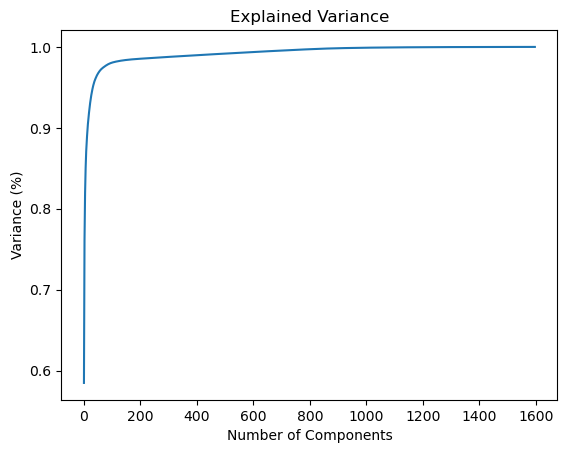

In [477]:
## getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(transformed_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()


In [478]:
x=np.where(np.cumsum(pca.explained_variance_ratio_)>0.9)
x

(array([  13,   14,   15, ..., 1595, 1596, 1597], dtype=int64),)

In [479]:
np.where(np.cumsum(pca.explained_variance_ratio_)>0.95)


(array([  32,   33,   34, ..., 1595, 1596, 1597], dtype=int64),)

In [481]:
pca = PCA(n_components=32)
new_data = pca.fit_transform(transformed_data)
# This will be the new data fed to the algorithm.
# Number of columns
num_components = 32

In [523]:
new_data.shape

(18278, 32)

In [482]:
# Column names pattern
column_names = [f'principal component {i}' for i in range(1, num_components + 1)]

# Create DataFrame
principal_Df = pd.DataFrame(data=new_data, columns=column_names)
principal_Df.head()

principal component 1  principal component 2  principal component 3  \
0                 -15.16                   7.65                  25.82   
1                 -13.34                   5.96                  19.66   
2                 -13.70                   8.31                  21.63   
3                  13.12                   1.94                  18.73   
4                 -13.47                   7.28                  22.27   

   principal component 4  principal component 5  principal component 6  \
0                  14.69                   9.94                   3.96   
1                   6.39                   7.48                   0.52   
2                  13.03                   8.87                   3.69   
3                  10.21                   6.43                  -0.29   
4                  13.04                   9.69                   3.67   

   principal component 7  principal component 8  principal component 9  \
0                  14.33                   0.45                   3.00   
1                   9.34                   0.61                   1.52   
2                  10.54                   2.01                   2.92   
3                   3.61                   0.25                   1.27   
4                  11.63                   0.55                   3.52   

   principal component 10  principal component 11  principal component 12  \
0                    3.82                   -5.11                    1.44   
1                    1.09                    0.67                    1.03   
2                    2.29                   -3.94                    1.02   
3                    2.93                   -4.48                    0.96   
4                    3.53                   -6.21                    0.92   

   principal component 13  principal component 14  principal component 15  \
0                    0.44                    2.66                   -0.21   
1                   -0.51                    0.47                   -0.53   
2                    0.55                    1.59                   -1.22   
3                   -0.62                    1.08                   -0.23   
4                    0.16                    1.88                   -1.24   

   principal component 16  principal component 17  principal component 18  \
0                   -0.72                   -2.23                    0.41   
1                   -0.03                   -0.11                    0.83   
2                    0.60                   -0.55                   -0.26   
3                   -0.24                   -1.30                   -0.47   
4                   -0.35                   -1.45                    0.15   

   principal component 19  principal component 20  principal component 21  \
0                    0.20                    0.13                    0.94   
1                    0.25                   -0.33                   -0.04   
2                   -0.94                    0.27                   -0.83   
3                   -0.30                    0.17                   -0.58   
4                   -0.23                    0.77                    0.81   

   principal component 22  principal component 23  principal component 24  \
0                   -0.52                   -0.55                   -0.54   
1                    0.05                    0.43                   -0.72   
2                    0.08                    0.85                    0.16   
3                   -0.02                   -0.04                    0.69   
4                   -0.60                    0.11                   -0.26   

   principal component 25  principal component 26  principal component 27  \
0                    3.32                   -4.15                    3.34   
1                    2.87                   -4.77                    3.14   
2                   -1.81                    2.84                   -1.58   
3                   -2.35                    

In [483]:
principal_Df.shape

(18278, 32)

### Applying Unsupervised Algorithms

* ##### K-Means

In [486]:
import warnings 
warnings.filterwarnings('ignore')

In [512]:
# Elbow method
from sklearn.cluster import KMeans
wcss=[]
for k in range (1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)
print(wcss)

[1330248.0638089587, 666329.4703303548, 526374.254183832, 445741.94058915577, 405728.21671090776, 376875.13091056445, 356893.3518462715, 340120.9845039221, 325816.1881436281, 314372.5524908476]


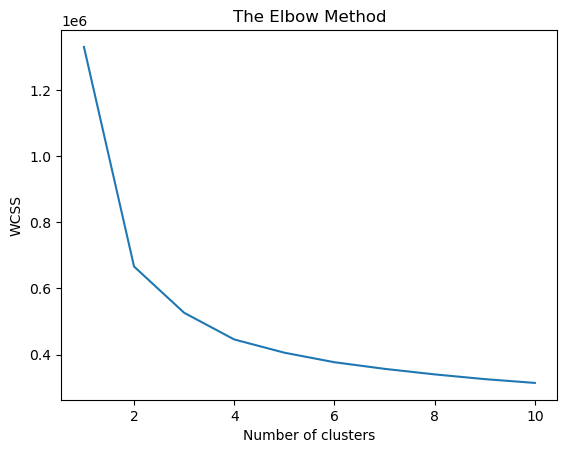

In [488]:
sns.lineplot(x=range(1,11),y=wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie., the point after which the distortion/inertia start decreasing in a linear fashion.

In [513]:
# We will take the optimal value of k as 2
model = KMeans(n_clusters=2)
#Training the model
model.fit(new_data)

KMeans(n_clusters=2)

In [514]:
model.labels_ #Predictions

array([0, 0, 0, ..., 0, 0, 0])

Evaluation metrics:

In [515]:
from sklearn.metrics import silhouette_score
score=silhouette_score(new_data,model.labels_)
score #K=2

0.6002723150532381

* ##### DBSCAN

In [501]:
## DBSCAN
from sklearn.cluster import DBSCAN


DBSCAN has two parameters: eps and min_samples .One of the most effective ways to determine eps is to plot a k-distance graph using the nearest neighbors method. The idea is to compute the distance to the k-th nearest neighbor for each point in the dataset and plot these distances.

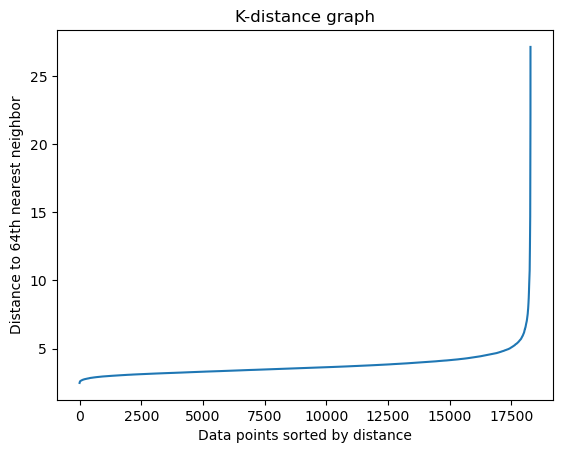

In [569]:
from sklearn.neighbors import NearestNeighbors
# Fit KNN model to find nearest neighbors
knn = NearestNeighbors(n_neighbors=64)  # Adjust min_samples here
knn.fit(new_data)  # PCA-reduced data
distances, indices = knn.kneighbors(new_data)

# Sort the distances and plot the k-distance graph
distances = np.sort(distances[:, 63], axis=0)  # Distance to the 64th nearest neighbor
plt.plot(distances)
plt.title('K-distance graph')
plt.xlabel('Data points sorted by distance')
plt.ylabel('Distance to 64th nearest neighbor')
plt.show()

In [586]:
from sklearn.metrics import silhouette_score


dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(new_data)

# If you want to evaluate the clustering performance
if len(set(labels)) > 1:  # More than one cluster formed
    score = silhouette_score(new_data, labels)
    print("Silhouette Score: ", score)
else:
    print("No clusters formed or only one cluster found.")

Silhouette Score:  0.573425876176649


In [587]:
#Get the cluster labels
labels = dbscan.labels_
labels

array([-1, -1, -1, ...,  0,  0,  0], dtype=int64)

In [588]:
print("Unique labels from DBSCAN:", np.unique(labels))

Unique labels from DBSCAN: [-1  0  1]


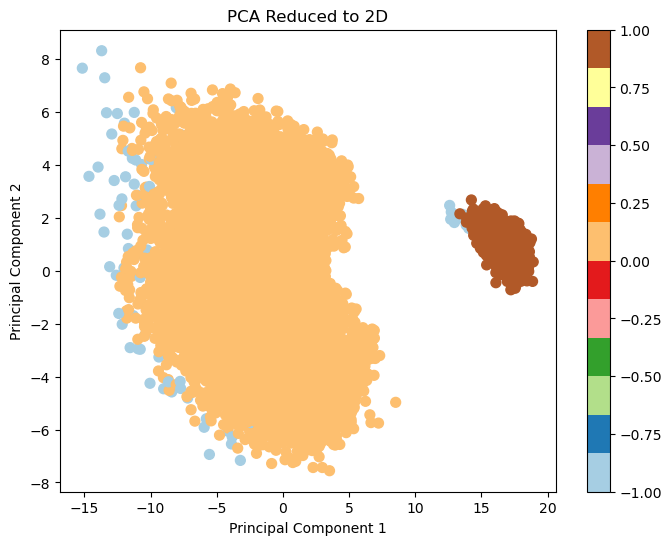

In [589]:
# `new_data` is  32-dimensional data
# Reduce the data to 2D
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(new_data)

# Plotting the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels, cmap='Paired', s=50)  # `labels` could be from DBSCAN or any clustering algorithm
plt.title('PCA Reduced to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()  # Show colorbar for clusters
plt.show()


* ##### Agglomerative clustering

Let's plot a Dendogram. A dendrogram is a key tool used in hierarchical clustering to visualize the arrangement of the clusters formed at each step of the clustering process. It is a tree-like diagram that shows how individual data points or clusters are merged step by step, from the bottom (individual data points) to the top (a single cluster containing all data points).

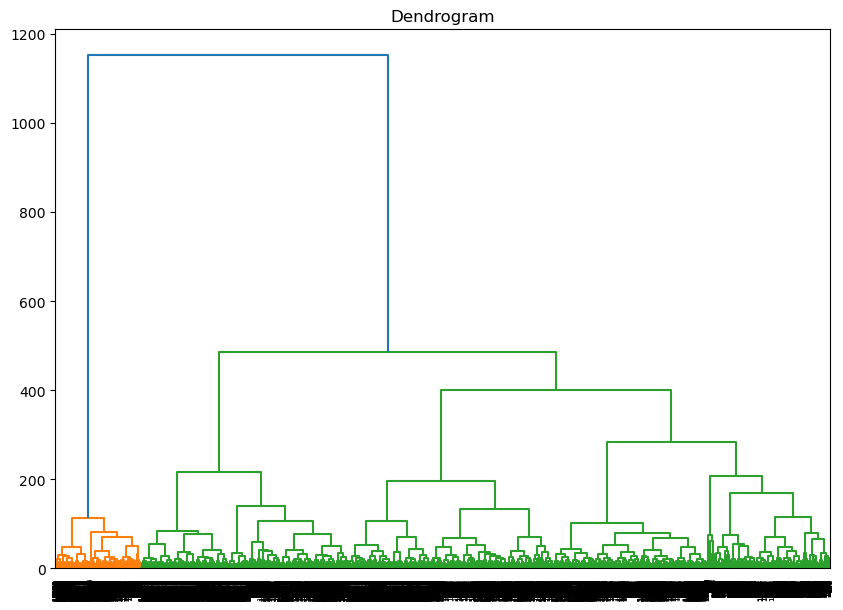

In [592]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(new_data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.show()

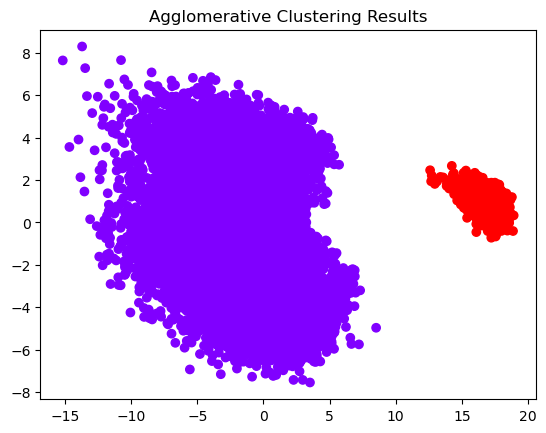

In [594]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage



# 1. Perform Agglomerative Clustering
# We are using Euclidean distance and Ward linkage for clustering.
agg_clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit the model and predict the clusters
labels = agg_clustering.fit_predict(new_data)

# 2. Visualize the clustering result
plt.scatter(new_data[:, 0], new_data[:, 1], c=labels, cmap='rainbow')
plt.title('Agglomerative Clustering Results')
plt.show()


In [595]:
# Calculate Silhouette Score
sil_score = silhouette_score(new_data, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.6003232677939814


### MODEL COMPARISON REPORT

I used these models here:
* ##### K-means
* ##### DBscan
* ##### Agglomerative Clustering.
   So among these Kmeans and agglomerative algorithm were better in creating the clusters and getting
  good score. Bor both these models we got approximatily 0.60 silhouette score. This score should be between 0.5 and 1 for a good model. 